<img src= 'http://www.bigbang-datascience.com/wp-content/uploads/2017/09/cropped-Logo-01.jpg' width=500/>

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set()  #  Will import Seaborn functionalities
# we don't like warnings
# you can comment the following 2 lines if you'd like to

from statsmodels.compat import lzip
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols


import warnings
warnings.filterwarnings('ignore')

<a id="I"></a>

# Reading Data

## Data preprocessing

In [2]:
insurance_ch = pd.read_csv('Insurance_cost.csv')
insurance_ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
insurance_ch.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Rudimentary Cleaning

The cell below will load our dataset in, and perform some rudimentary cleaning.  

Do not worry if you do not understand all of the code below. Comments are provided if you are interested in following along.

In [4]:
# Column names may be accessed (and changed) using the `.columns` attribute as below
print("Old Column Names:\n", insurance_ch.columns) 

Old Column Names:
 Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [5]:
# Stripping out spaces from ends of names, and replacing internal spaces with "_"
print("\nStripping spaces from ends of column names; replacing internal spaces with '_'\n")
insurance_ch.columns = [col.strip().replace(' ', '_').lower() for col in insurance_ch.columns]

# Print edited column names
print("\nNew Column Names:\n", insurance_ch.columns)


Stripping spaces from ends of column names; replacing internal spaces with '_'


New Column Names:
 Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


# Exploratory Data Analysis

In [6]:
insurance_ch.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

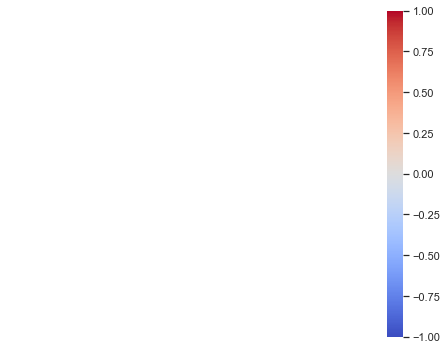

In [7]:
# Visualize the correlation between the number of 
# missing values in different columns as a heatmap 

import missingno as msno
msno.heatmap(insurance_ch, cmap='coolwarm', figsize=(8,6), fontsize=10);

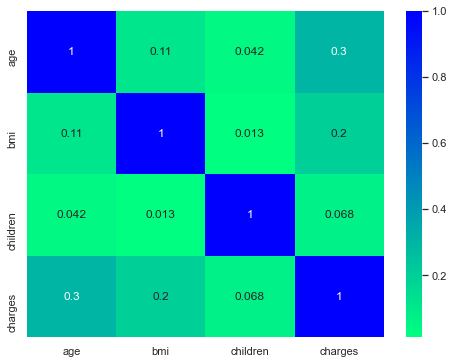

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(insurance_ch.corr(),annot=True,cmap="winter_r")
plt.show()

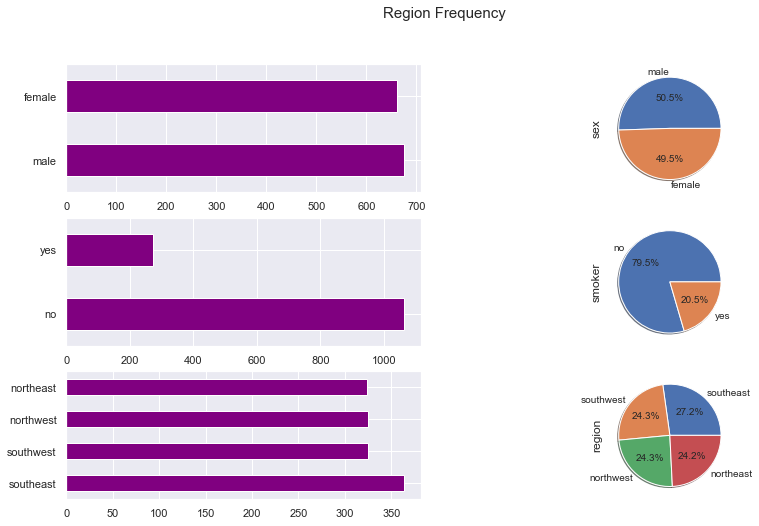

In [9]:
#Plotting Categorical Variables
fig, ax = plt.subplots(3, 2 ,figsize=(14,8))
insurance_ch["sex"].value_counts().plot.barh(color="purple", ax=ax[0,0])
insurance_ch["sex"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[0,1])
fig.suptitle("Gender Frequency", fontsize=15)
plt.xticks(rotation=0)
plt.yticks(rotation=45)

insurance_ch["smoker"].value_counts().plot.barh(color="purple", ax=ax[1,0])
insurance_ch["smoker"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1,1])
fig.suptitle("Smoking Frequency", fontsize=15)
plt.xticks(rotation=0)
plt.yticks(rotation=45)

insurance_ch["region"].value_counts().plot.barh(color="purple", ax=ax[2,0])
insurance_ch["region"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[2,1])
fig.suptitle("Region Frequency", fontsize=15)
plt.xticks(rotation=0)
plt.yticks(rotation=45)

plt.show()

<Figure size 1440x3600 with 0 Axes>

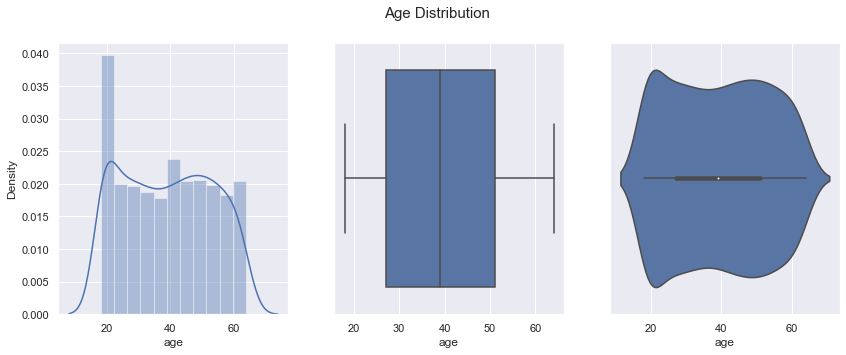

<Figure size 1440x3600 with 0 Axes>

In [10]:
#Plotting Numerical Variables
fig, ax = plt.subplots(1, 3,figsize=(14,5))
fig.suptitle("Age Distribution", fontsize=15)
sns.distplot(insurance_ch["age"], ax=ax[0])
sns.boxplot(insurance_ch["age"], ax=ax[1])
sns.violinplot(insurance_ch["age"], ax=ax[2])
plt.figure(figsize=(20,50))


<AxesSubplot:xlabel='bmi'>

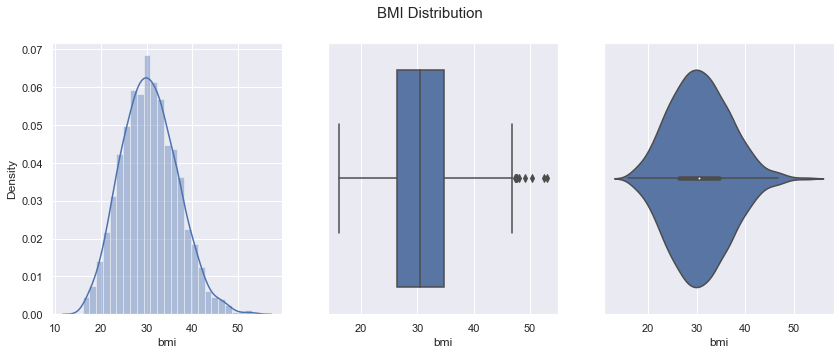

In [11]:
fig, ax = plt.subplots(1, 3,figsize=(14,5))
fig.suptitle("BMI Distribution", fontsize=15)
sns.distplot(insurance_ch["bmi"], ax=ax[0])
sns.boxplot(insurance_ch["bmi"], ax=ax[1])
sns.violinplot(insurance_ch["bmi"], ax=ax[2])

<AxesSubplot:xlabel='children'>

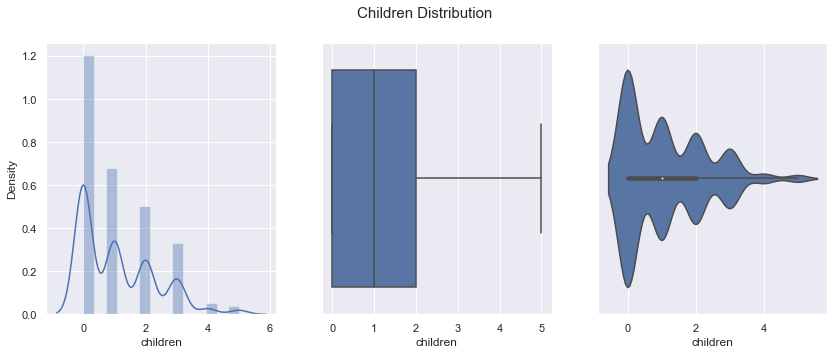

In [12]:
fig, ax = plt.subplots(1, 3,figsize=(14,5))
fig.suptitle("Children Distribution", fontsize=15)
sns.distplot(insurance_ch["children"], ax=ax[0])
sns.boxplot(insurance_ch["children"], ax=ax[1])
sns.violinplot(insurance_ch["children"], ax=ax[2])

<AxesSubplot:xlabel='charges'>

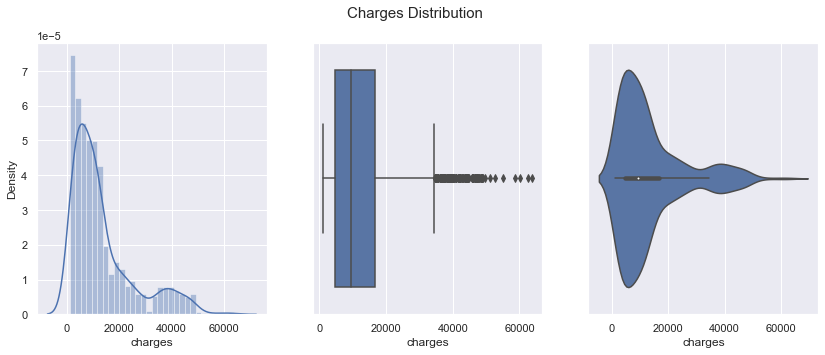

In [13]:
fig, ax = plt.subplots(1, 3,figsize=(14,5))
fig.suptitle("Charges Distribution", fontsize=15)
sns.distplot(insurance_ch["charges"], ax=ax[0])
sns.boxplot(insurance_ch["charges"], ax=ax[1])
sns.violinplot(insurance_ch["charges"], ax=ax[2])


<AxesSubplot:xlabel='age', ylabel='count'>

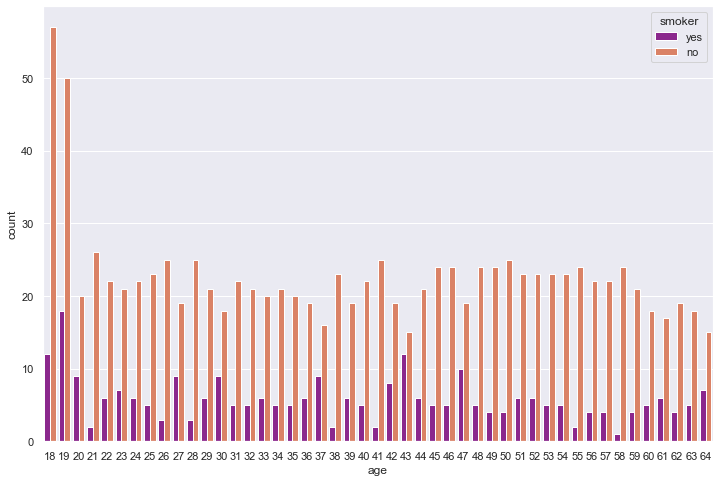

In [14]:
#age vs smoker
plt.figure(figsize=(12,8))
a=insurance_ch["age"].sort_values()
sns.countplot(a,hue=insurance_ch["smoker"],palette="plasma")

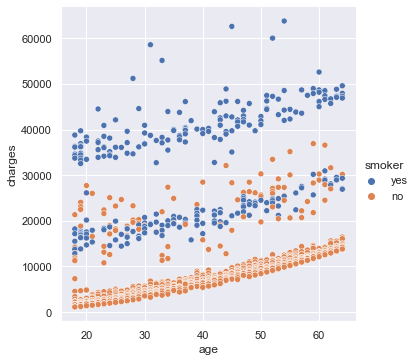

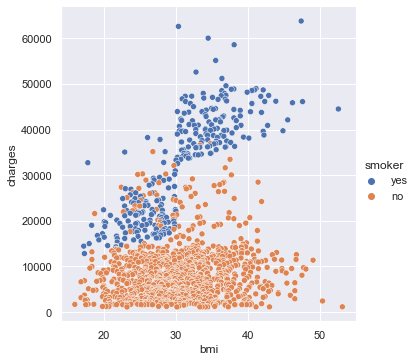

In [15]:
sns.relplot(x="age", y="charges", hue="smoker", data=insurance_ch)
sns.relplot(x="bmi", y="charges", hue="smoker", data=insurance_ch)
plt.show()

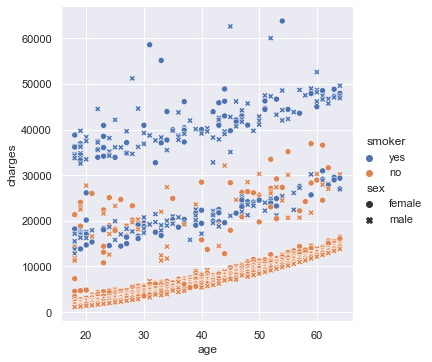

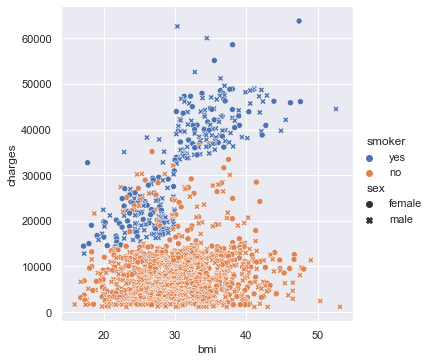

In [16]:
sns.relplot(x="age", y="charges", hue="smoker", style="sex",data=insurance_ch)
sns.relplot(x="bmi", y="charges", hue="smoker", style="sex",data=insurance_ch)

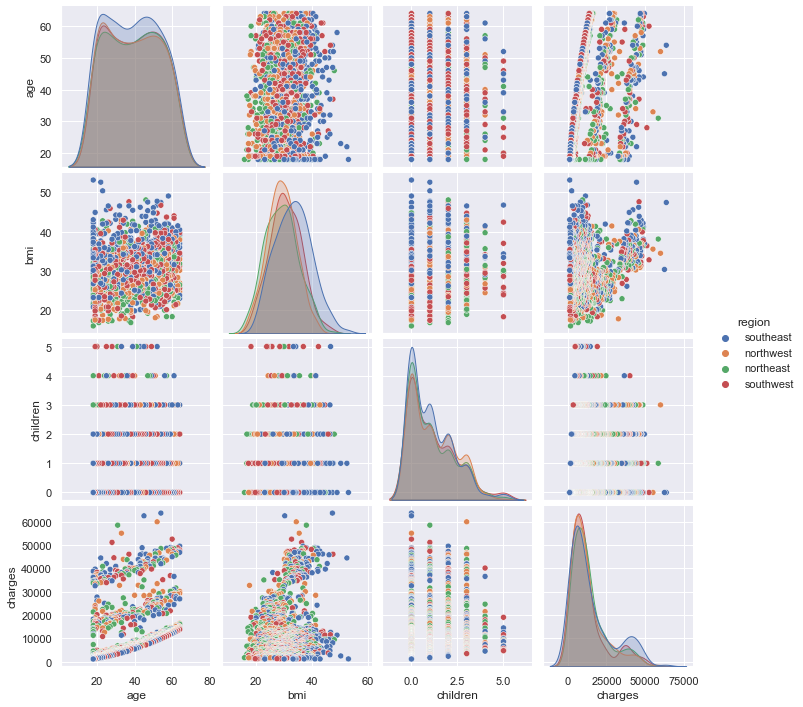

In [17]:
sns.pairplot(insurance_ch, hue="region")

## Checking and Relaxing the OLS assumptions

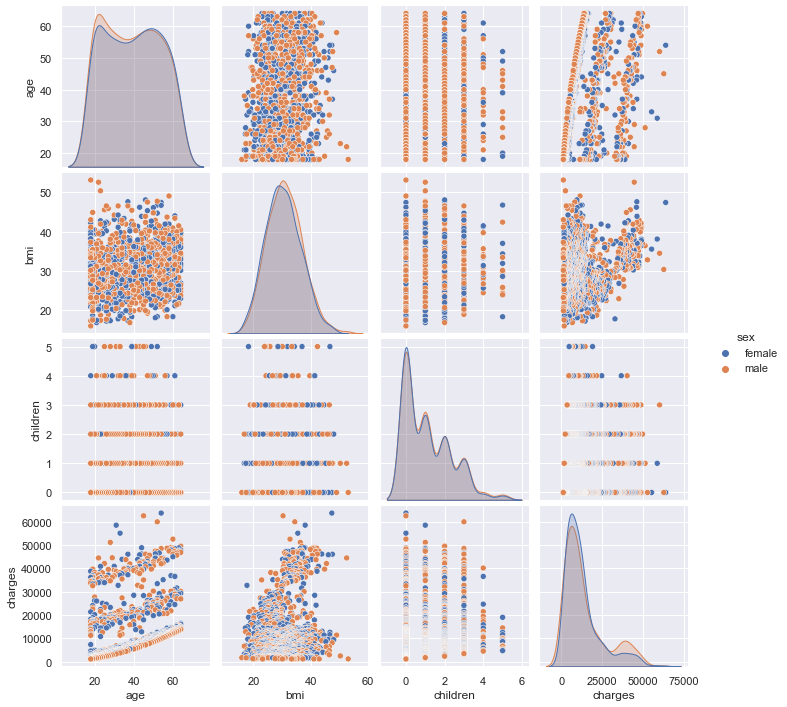

In [18]:
sns.pairplot(insurance_ch, hue="sex")

# Data Preparation

## Dummy Varaibles

In [19]:
insurance_ch_copy = insurance_ch.copy()

data_column_category = insurance_ch_copy.select_dtypes(exclude=[np.number]).columns
data_column_category

Index(['sex', 'smoker', 'region'], dtype='object')

In [20]:
insurance_ch.shape

(1338, 7)

In [21]:
insurance_ch_copy.describe(include=['object', 'bool'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [22]:
# Categorical boolean mask
categorical_feature_mask = insurance_ch_copy.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = insurance_ch_copy.columns[categorical_feature_mask].tolist()

categorical_cols

['sex', 'smoker', 'region']

In [23]:
insurance_ch_copy.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [24]:
# Create dummy variables for the categorical features
to_dummy = insurance_ch_copy.select_dtypes(exclude=[np.number]).columns

insurance_ch_copy = pd.get_dummies(insurance_ch_copy, prefix = to_dummy, columns = to_dummy, drop_first = True)
insurance_ch_copy.head(10)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,54,47.410,0,63770.42801,0,1,0,1,0
1,45,30.360,0,62592.87309,1,1,0,1,0
2,52,34.485,3,60021.39897,1,1,1,0,0
3,31,38.095,1,58571.07448,0,1,0,0,0
4,33,35.530,0,55135.40209,0,1,1,0,0
5,60,32.800,0,52590.82939,1,1,0,0,1
6,28,36.400,1,51194.55914,1,1,0,0,1
7,64,36.960,2,49577.66240,1,1,0,1,0
8,59,41.140,1,48970.24760,1,1,0,1,0
9,44,38.060,0,48885.13561,0,1,0,1,0


## Remove outliers

<AxesSubplot:xlabel='charges'>

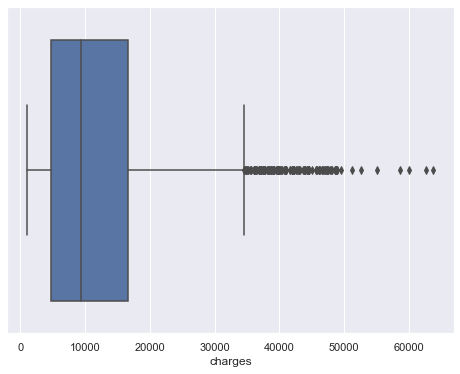

In [25]:
#### Remove outliers
plt.figure(figsize=(8,6))
import seaborn as sns
sns.boxplot(x=insurance_ch_copy['charges'])

<AxesSubplot:xlabel='charges', ylabel='Density'>

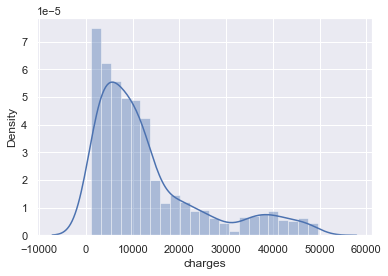

In [26]:
#removing outliers considering charges pdf
indexNames = insurance_ch_copy[insurance_ch_copy['charges'] >= 50000 ].index #you can use & formulti conditions
insurance_ch_copy.drop(indexNames , inplace=True)
sns.distplot(insurance_ch_copy['charges'])

<AxesSubplot:xlabel='charges'>

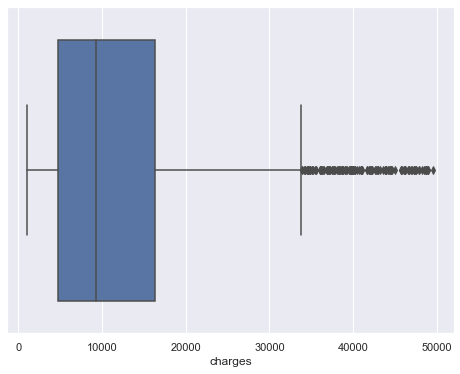

In [27]:
#### Remove outliers
plt.figure(figsize=(8,6))
import seaborn as sns
sns.boxplot(x=insurance_ch_copy['charges'])

### Transforming Skewed Data

We can objectively determine if the variable is skewed using the Shapiro-Wilks test. The null hypothesis for this test is that the data is a sample from a normal distribution, so a p-value less than 0.05 indicates significant skewness. We’ll apply the test to the response variable Sale Price above labeled “resp” using Scipy.stats in Python.

Why do we care if the data is skewed? If the response variable is skewed like insurance charges, the model will be trained on a much larger number of moderately charges, and will be less likely to successfully predict the price for the most expensive insurances. The concept is the same as training a model on imbalanced categorical classes. If the values of a certain independent variable (feature) are skewed, depending on the model, skewness may violate model assumptions (e.g. logistic regression) or may impair the interpretation of feature importance.

In [28]:
insurance_ch_copy.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [29]:
insurance_ch_copy = insurance_ch_copy.copy()

resp = insurance_ch_copy['charges']
from scipy.stats import shapiro
shapiro(resp)[1]

2.294173380509769e-36

The p-value is not surprisingly less than 0.05, so we can conclude that the variable is skewed. A more convenient way of evaluating skewness is with pandas’ “.skew” method. It calculates the Fisher–Pearson standardized moment coefficient for all columns in a dataframe

We can calculate it for all the features in dataset (labeled “df”) simultaneously with the following code.

In [30]:
#Determine index for continuous variables
num_feast = insurance_ch_copy.dtypes[insurance_ch_copy.dtypes!= 'object'].index
skew_feats = insurance_ch_copy[num_feast].skew().sort_values(ascending = False)
skweness = pd.DataFrame({'Skew': skew_feats})
skweness

,Skew
smoker_yes,1.497000
charges,1.452558
region_northwest,1.201846
region_southwest,1.201846
region_southeast,1.026035
children,0.936365
bmi,0.283592
age,0.057116
sex_male,-0.019557


### Square Root Transformation

<AxesSubplot:xlabel='charges', ylabel='Density'>

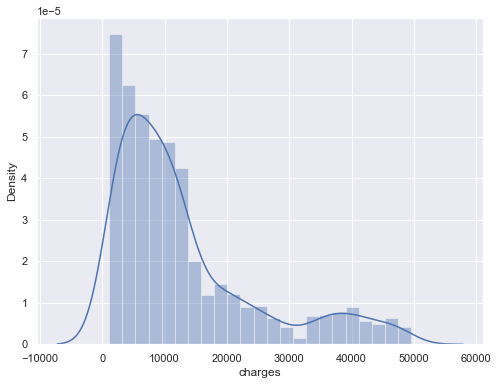

In [31]:
plt.figure(figsize=(8,6))
sns.distplot(resp)

<AxesSubplot:xlabel='charges', ylabel='Density'>

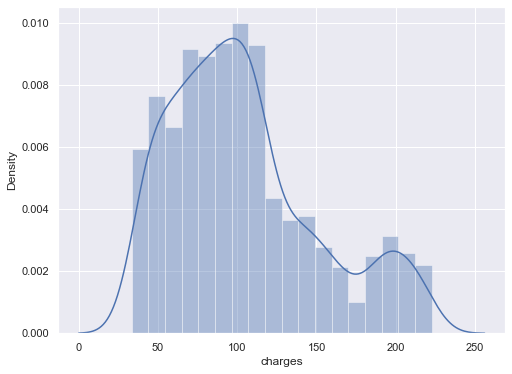

In [32]:
plt.figure(figsize=(8,6))
sqrt_resp = resp ** (.5)
sns.distplot(sqrt_resp)

In [33]:
sqrt_resp.skew()

0.7643017262968103

### Reciprocal Transofrmation

<AxesSubplot:xlabel='charges', ylabel='Density'>

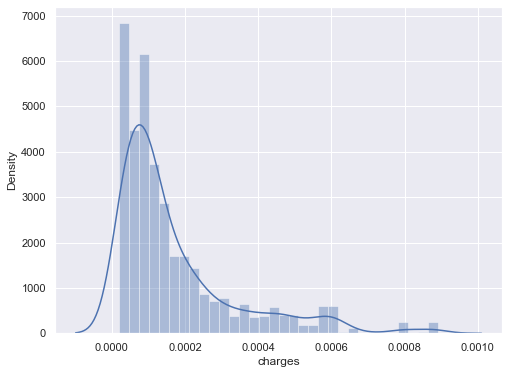

In [34]:
plt.figure(figsize=(8,6))
recip = 1/insurance_ch_copy['charges']
sns.distplot(recip)

In [35]:
recip.skew()

1.8737731906545843

### Log Transformation

<AxesSubplot:xlabel='charges', ylabel='Density'>

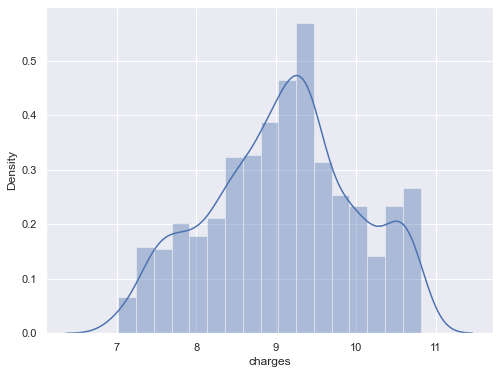

In [36]:
plt.figure(figsize=(8,6))
log_resp = np.log(resp)
sns.distplot(log_resp)

In [37]:
log_resp.skew()

-0.10565581016826024

### Power Transform

<AxesSubplot:ylabel='Density'>

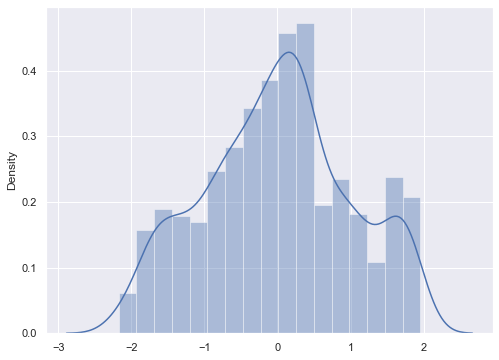

In [38]:
# power transform the raw data
from sklearn.preprocessing import PowerTransformer

plt.figure(figsize=(8,6))

resp2 =resp.values.reshape((len(resp),1))
power_resp = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power_resp.fit_transform(resp2)


sns.distplot(data_trans)

In [39]:
# data_trans.skew()

### Box Cox Transformation

An alternative to manually trying a variety of transformations is the Box Cox transformation. For each variable, a Box Cox transformation estimates the value lambda from -5 to 5 that maximizes the normality of the data using the equation below.

Lambda value used for Transformation: 0.051848043790152426


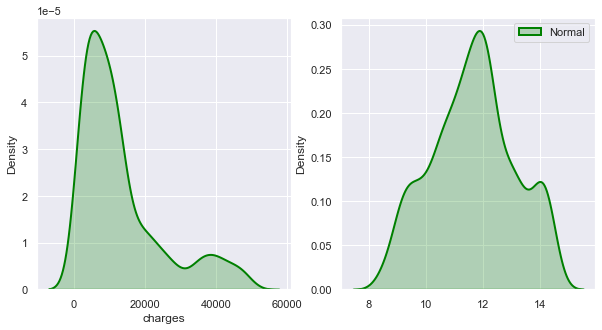

In [40]:
from scipy import stats
original_data = insurance_ch_copy['charges']
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(insurance_ch_copy['charges'])
  
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {fitted_lambda}")

In [41]:
# transform training data & save lambda value
insurance_ch_copy['log_charges'] = np.log(insurance_ch_copy['charges'])

In [42]:
insurance_ch_copy.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest',
       'log_charges'],
      dtype='object')

In [43]:
insurance_ch_copy = insurance_ch_copy[['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest',
       'log_charges']]

#### linearity

In [44]:
insurance_ch_copy.rename(columns = {'log_charges':'charges'}, inplace = True)

In [45]:
# As you see in the plot charges and age or charges and bmi are highly scattered so i will use log scale
log_charges = np.log(insurance_ch['charges'])
insurance_ch['log_charges'] = log_charges

log_age = np.log(insurance_ch['age'])
insurance_ch['log_age'] = log_age

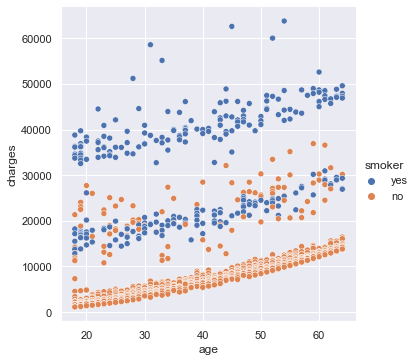

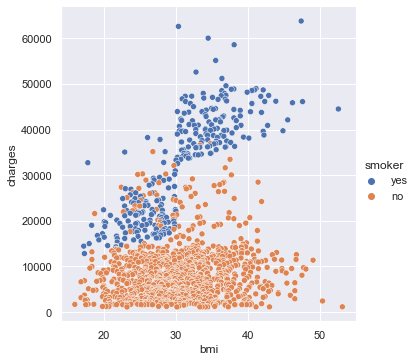

In [46]:
# Raw Data
sns.relplot(x="age", y="charges", hue="smoker", data=insurance_ch);
sns.relplot(x="bmi", y="charges", hue="smoker", data=insurance_ch);

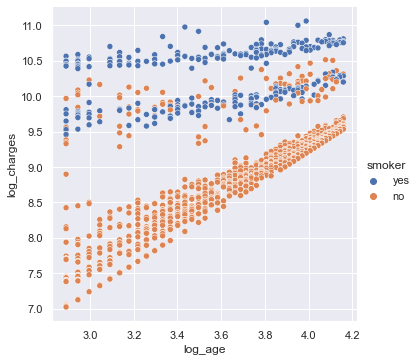

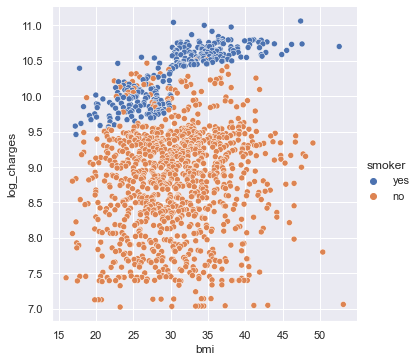

In [47]:
# Log Data
sns.relplot(x="log_age", y="log_charges", hue="smoker", data=insurance_ch);
sns.relplot(x="bmi", y="log_charges", hue="smoker", data=insurance_ch);

#### Multicollinearity

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = insurance_ch[['age', 'bmi', 'children']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,7.536550,age
1,7.846515,bmi
2,1.796637,children


<a id="IV"></a>
## Features importance

### Identifying X and y

In [49]:
insurance_ch_copy.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
7,64,36.96,2,1,1,0,1,0,10.811296
8,59,41.14,1,1,1,0,1,0,10.798968
9,44,38.06,0,0,1,0,1,0,10.797229
10,63,37.70,0,0,1,0,0,1,10.795986
11,57,42.13,1,1,1,0,1,0,10.792931


In [50]:
# insurance_ch_copy.rename(columns = {'log_charges':'charges'}, inplace = True)

In [51]:
 X = insurance_ch_copy.drop('charges', axis = 1)
 y = insurance_ch_copy.charges

In [52]:
# Splitting the insurance_chset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(X,y,
                                               test_size = .2,
                                               random_state=12)


### Important Features with Sequential Feature Selector

In [53]:
from sklearn.linear_model import LinearRegression 

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = 4,forward=True,floating=False, scoring='r2',cv=5)

# Perform SFFS
sfs1 = sfs1.fit(training_features, training_target)


In [54]:
clf

LinearRegression()

In [55]:
sfs1.k_feature_idx_

(0, 1, 2, 4)

sfs1.k_feature_names_

In [56]:
sfs1.k_score_

0.7564343723162061

### Important Features with Machine Learning

In [57]:
# %%time

# from sklearn.tree import DecisionTreeRegressor
# DecisionTreeModel = DecisionTreeRegressor(random_state = 0)

# DecisionTreeModel.fit(training_features, training_target) 
# #DecisionTreeModel

# DecisionTreePred = DecisionTreeModel.predict(test_features) # I already Know y_test

In [58]:
%%time

import xgboost as xgb

XGBregressor = xgb.XGBRegressor( n_estimators = 100, reg_lambda = 1, gamma = 0, max_depth = 3)

XGBregressor.fit(training_features, training_target) 
#DecisionTreeModel

XGB_pred = XGBregressor.predict(test_features) # I already Know y_test

Wall time: 834 ms


<a id = "feature-importance"></a>

### Plot feature importances

A fantastic characteristic of many ensemble models is that you have the ability to interpret the feature importance. As you learned with Decision Trees, the most important features are selected first during the construction of a tree. Using the gini or information gain generated from using a feature to make a split, a feature importance score can be calculated.

In the case of ensembles, these feature importance scores are aggregated over all of the trees within the ensemble. `scikit-learn` conveniently calculates a `.feature_importance_` score for many of their ensemble implementations.

In [59]:
XGBregressor.fit(training_features, training_target)
### Verification:
results = pd.DataFrame(index= training_features.columns, data={'importance':XGBregressor.feature_importances_})
print('Feature importances:\n{}'.format(results))

Feature importances:
                  importance
age                 0.121894
bmi                 0.012348
children            0.035408
sex_male            0.014088
smoker_yes          0.790125
region_northwest    0.003167
region_southeast    0.010333
region_southwest    0.012636


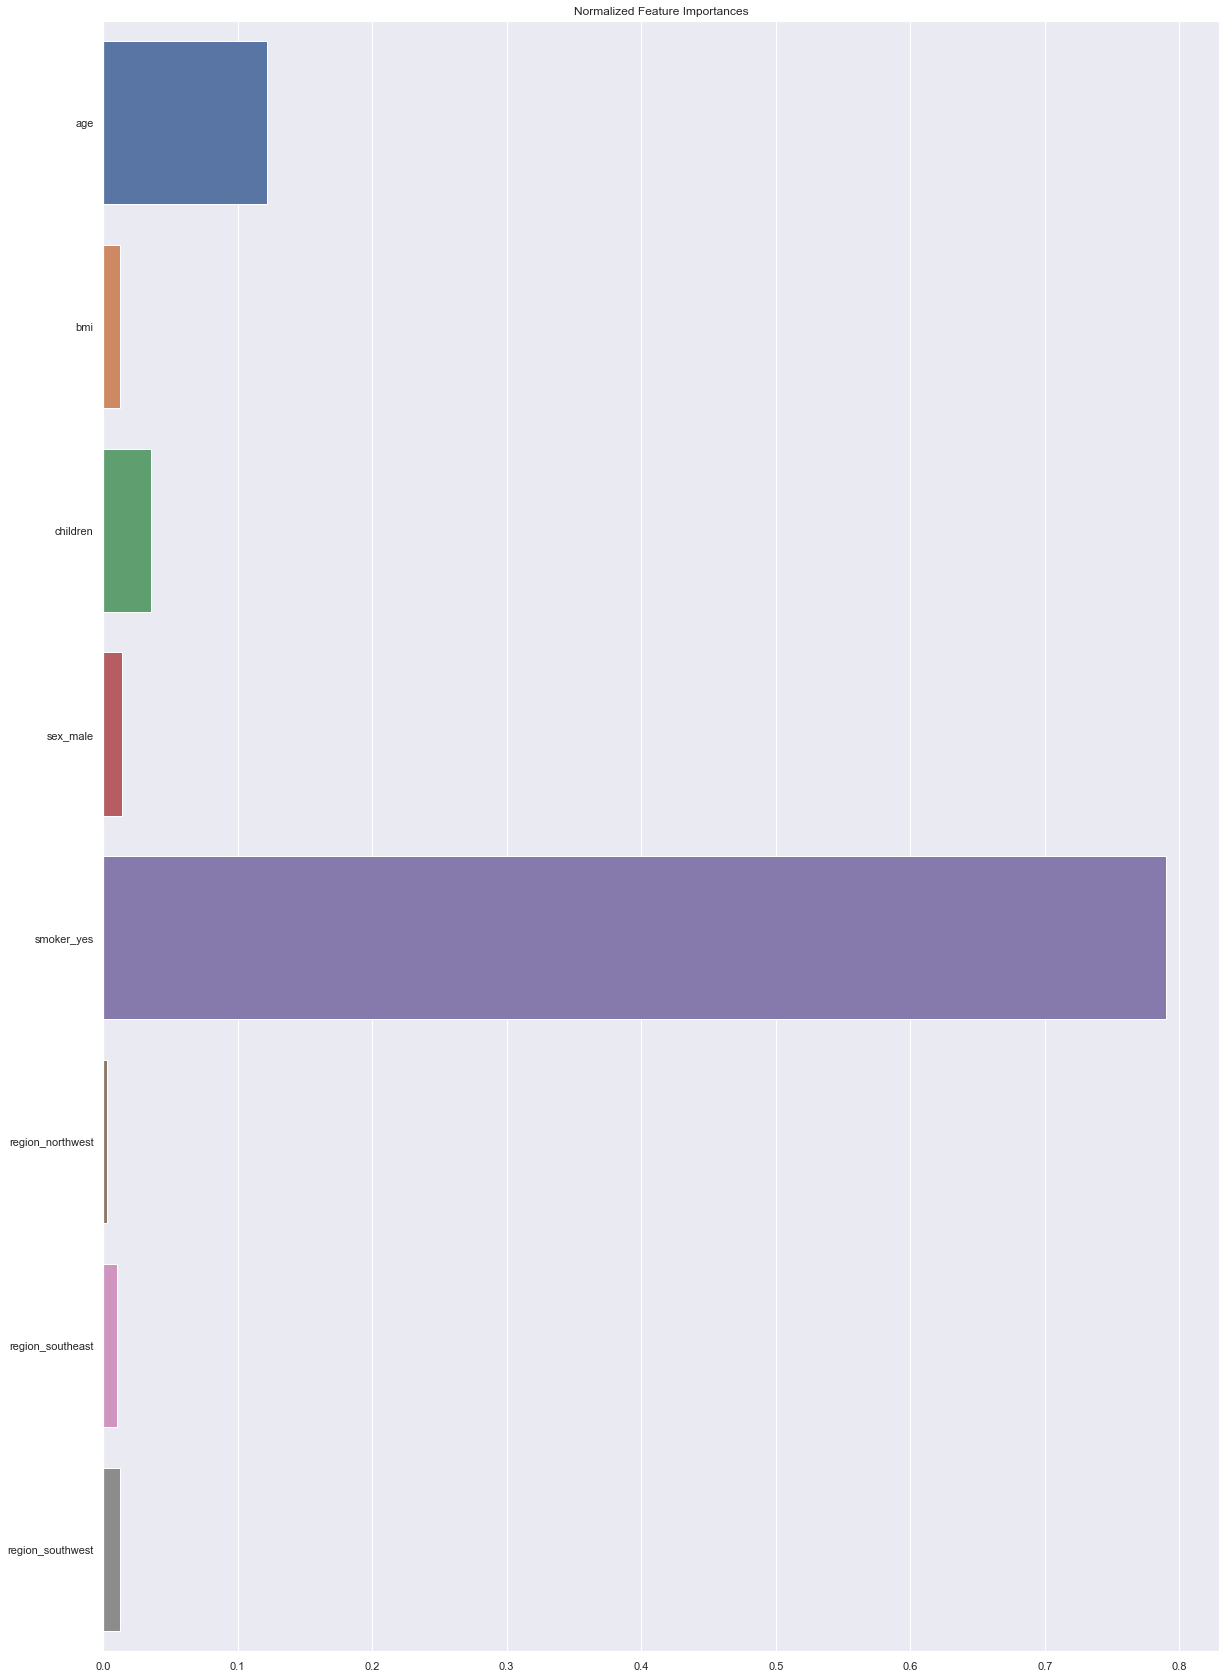

In [60]:
# Plot feature importances
plt.rcParams['figure.figsize'] = 20,30
plt.title('Normalized Feature Importances')
sns.barplot(y =training_features.columns, x = XGBregressor.feature_importances_)
plt.show()

In [61]:
feature_importances = pd.DataFrame({'Importance Coef' :XGBregressor.feature_importances_ , 'Features' : training_features.columns})
feature_importances.nlargest(20, 'Importance Coef')

,Importance Coef,Features
4,0.790125,smoker_yes
0,0.121894,age
2,0.035408,children
3,0.014088,sex_male
7,0.012636,region_southwest
1,0.012348,bmi
6,0.010333,region_southeast
5,0.003167,region_northwest


### Data with Important Features

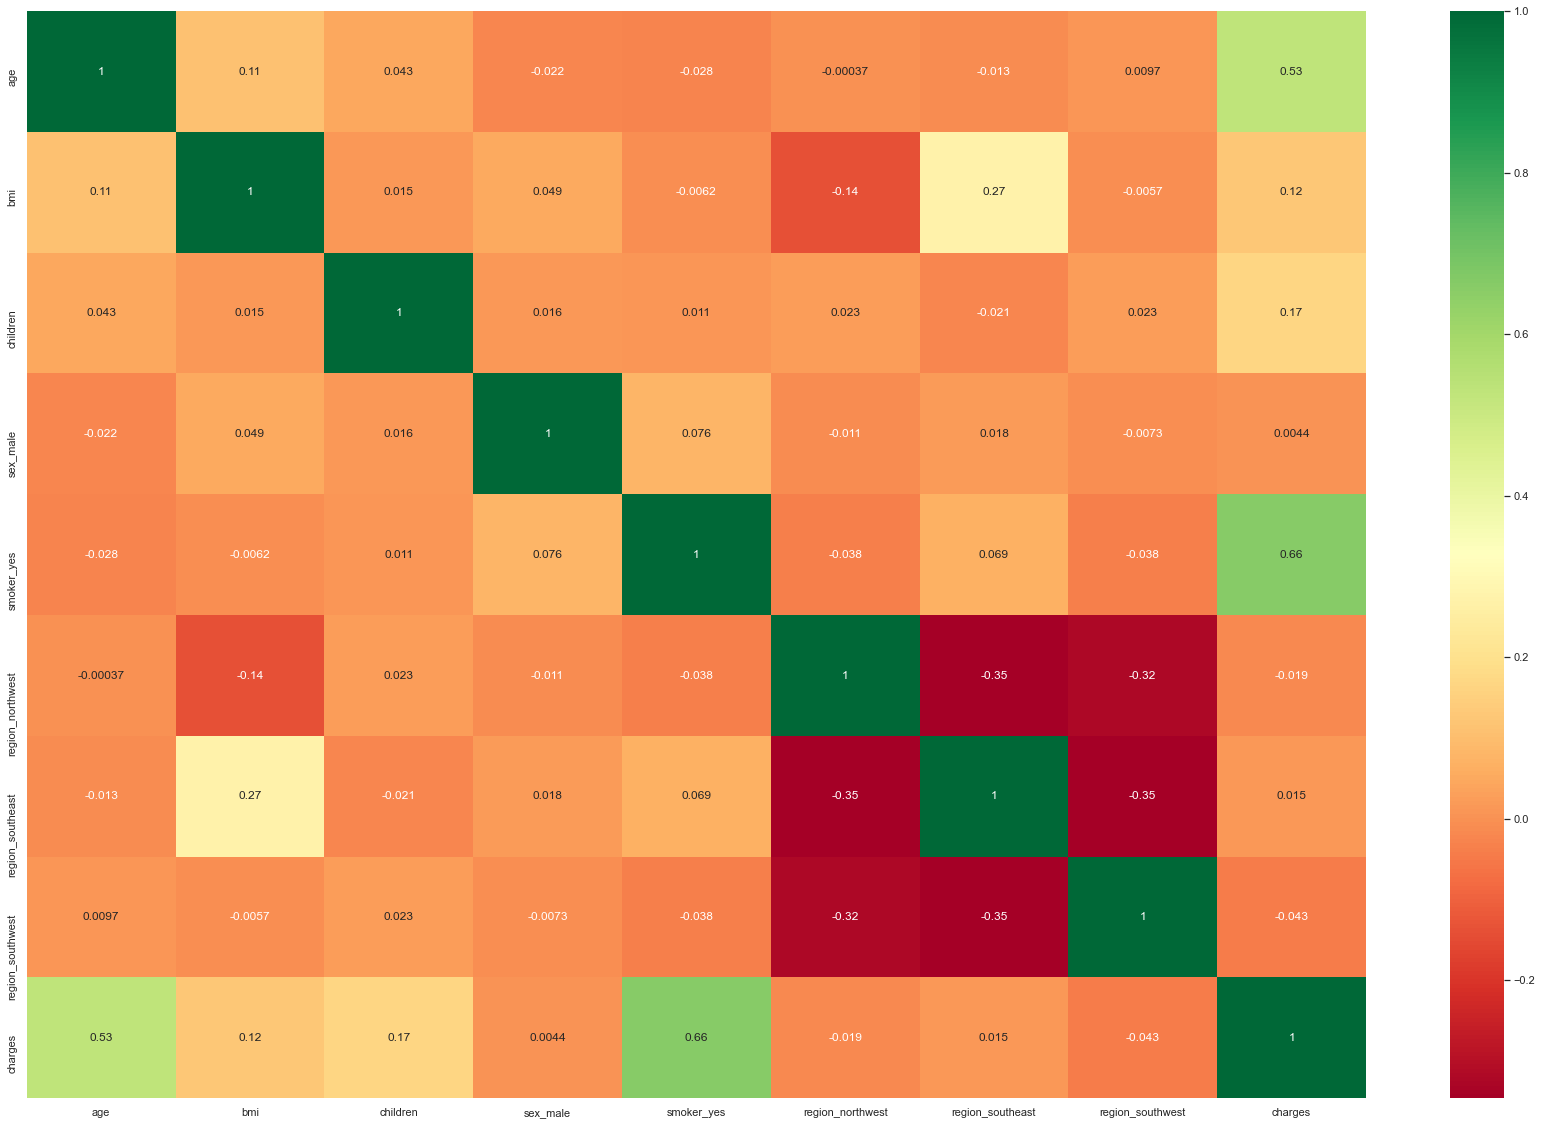

In [62]:
corrmat = insurance_ch_copy.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,20))
#plot heat map
g=sns.heatmap(insurance_ch_copy[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<AxesSubplot:>

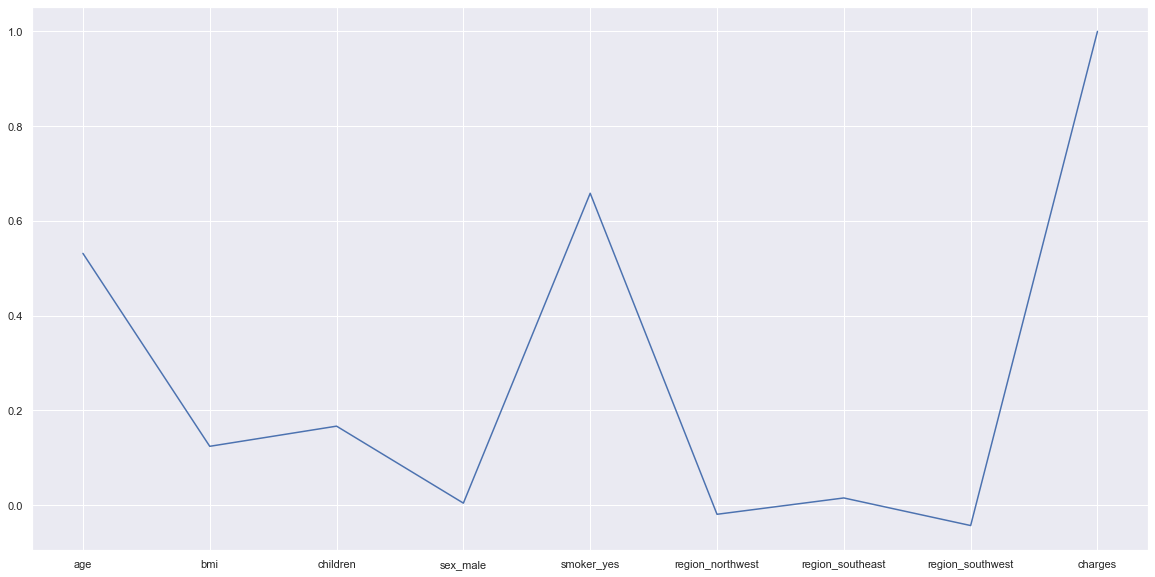

In [63]:
# Correlation with Target Variable
plt.figure(figsize=(20,10))
insurance_ch_copy.corr()['charges'].plot()
#HemogCatinsurance_ch.corr()[:].plot()
#HemogCatinsurance_ch.corr().plot()

<a id="IV"></a>
# Predictive Analytics 

## Simple Linear Regression Machine Learning

#### Machine Learning Method

In [64]:
insurance_ch_processed = insurance_ch_copy
insurance_ch_processed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
7,64,36.96,2,1,1,0,1,0,10.811296
8,59,41.14,1,1,1,0,1,0,10.798968
9,44,38.06,0,0,1,0,1,0,10.797229
10,63,37.70,0,0,1,0,0,1,10.795986
11,57,42.13,1,1,1,0,1,0,10.792931


In [65]:
X = insurance_ch_processed['smoker_yes'].values.reshape(-1,1)
y = insurance_ch_processed['charges'].values.reshape(-1,1)

In [66]:
# Splitting the insurance_chset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(X,
                                               y,
                                               test_size = .2,
                                               random_state=12)

In [67]:
# Fitting Decision Tree Classification to the Training set
from sklearn.linear_model import LinearRegression # Class

In [68]:
# Create the model using LogisticRegression class
LRegressor = LinearRegression(fit_intercept=True)

In [69]:
# Fitting the Model
LRegressor.fit(training_features, training_target)

LinearRegression()

In [70]:
# Priting the Slope and The Intercept

print("Model intercept:", LRegressor.intercept_)
print("Model slope:    ", LRegressor.coef_[0])

Model intercept: [8.77015553]
Model slope:     [1.53135549]


In [71]:
y_train_pred = LRegressor.predict(training_features)
y_train_pred

array([[8.77015553],
       [8.77015553],
       [8.77015553],
       ...,
       [8.77015553],
       [8.77015553],
       [8.77015553]])

In [72]:
y_test_pred = LRegressor.predict(test_features)
y_test_pred[:10]

array([[ 8.77015553],
       [ 8.77015553],
       [10.30151102],
       [10.30151102],
       [ 8.77015553],
       [ 8.77015553],
       [ 8.77015553],
       [ 8.77015553],
       [ 8.77015553],
       [10.30151102]])

In [73]:
# Predicting the Test set results

y_pred = LRegressor.predict(test_features)

print(LRegressor.intercept_)
print(LRegressor.coef_)

[8.77015553]
[[1.53135549]]


Now compare the actual output values for test_features with the predicted values, execute the following script:

In [74]:
df = pd.DataFrame({'Actual': test_target.flatten(), 'Predicted': y_test_pred.flatten()})
df.head()

,Actual,Predicted
0,8.304138,8.770156
1,9.060039,8.770156
2,10.431393,10.301511
3,9.743515,10.301511
4,8.941077,8.770156


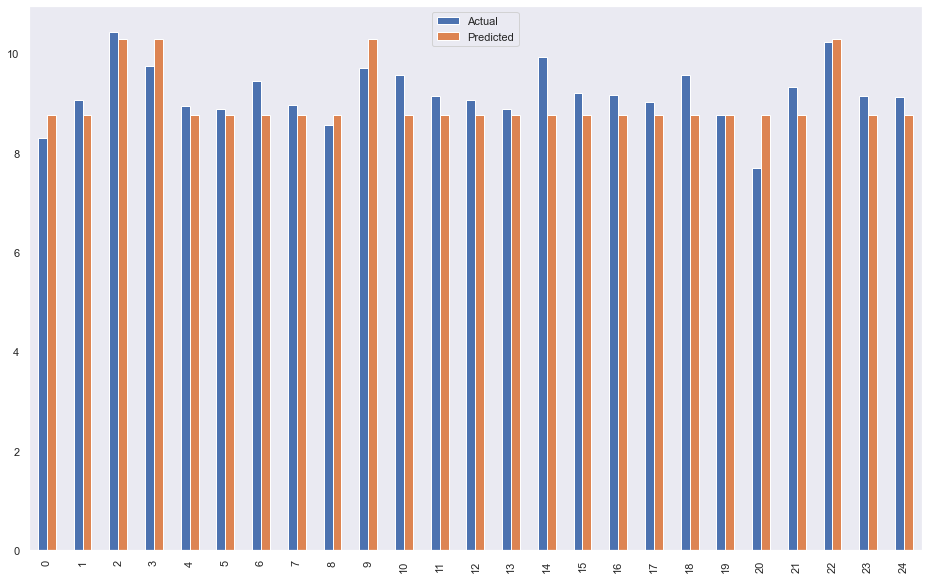

In [75]:
df = df.head(25)
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

The final step is to evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithms perform on a particular insurance_chset. For regression algorithms, three evaluation metrics are commonly used:

### Calculating the Error

**Sum of residuals (∑(Y – h(X)))** – it might result in cancelling out of positive and negative errors.  
**Sum of the absolute value of residuals (∑|Y-h(X)|)** – absolute value would prevent cancellation of errors  
**Sum of square of residuals ( ∑ (Y-h(X))2)** – it’s the method mostly used in practice since here we penalize higher   error value much more as compared to a smaller one, so that there is a significant difference between making big   errors and small errors, which makes it easy to differentiate and select the best fit line.

####  Method 1: Mean Squared Error (MSE)

1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors. It is calculated as:
<img src = https://miro.medium.com/max/419/1*4kvomfLGxysM67hza_-B9Q.png >
<center>Mean Absolute Error</center> 

2. Mean Squared Error (MSE) is the mean of the squared errors and is calculated as:

<img src = https://miro.medium.com/max/381/1*T37cOEU9OkXNPuqGQcXHSA.png >
<center>Mean Squared Error</center> 

3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
<img src = https://miro.medium.com/max/409/1*SGBsn7WytmYYbuTgDatIpw.gif >
<center>Root Mean Squared Error</center> 


Luckily, we don’t have to perform these calculations manually. The Scikit-Learn library comes with pre-built functions that can be used to find out these values for us.
Let’s find the values for these metrics using our test insurance_ch.

In [76]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(test_target, y_test_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(test_target, y_test_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_target, y_test_pred)))

Mean Absolute Error: 0.5437758258816672
Mean Squared Error: 0.44843465326615894
Root Mean Squared Error: 0.6696526362720892


####   Method 2: Mean Squared Error (MSE)

$$MSE=\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y}_i)^2$$

* The average value of the Sums of Squared Error cost function  

* Useful for comparing different regression models 

* For tuning parameters via a grid search and cross-validation

In [77]:
from sklearn.metrics import mean_squared_error

In [78]:
mean_squared_error(training_target, y_train_pred)

0.4768133631962791

In [79]:
mean_squared_error(test_target, y_test_pred)

0.44843465326615894

####  Method 3: Coefficient of Determination, $R^2$

$$R^2 = 1 - \frac{SSE}{SST}$$

<center>SSE: Sum of squared errors</center>

<center>SST: Total sum of square</center>

In [80]:
from sklearn.metrics import r2_score

In [81]:
r2_score(training_target, y_train_pred)

0.44227172682890026

In [82]:
Score = LRegressor.score(training_features, training_target)
print("The R² score of our model:", Score)

The R² score of our model: 0.44227172682890026


This is the R² score of our model. As you probably remember, this the percentage of explained variance of the predictions. The result should be approximately 10.6178 and -0.2317 respectively. This means that for every one unit of change in Age, the change in the House price is about -0.01%.

In [83]:
r2_score(test_target, y_test_pred)

0.38900376172178086

This is the R² score of our model. As you probably remember, this the percentage of explained variance of the predictions. 

In [84]:
Score = LRegressor.score(test_features, test_target)
print("The R² score of our model:", Score)

The R² score of our model: 0.38900376172178086


### Visualising the Training set results

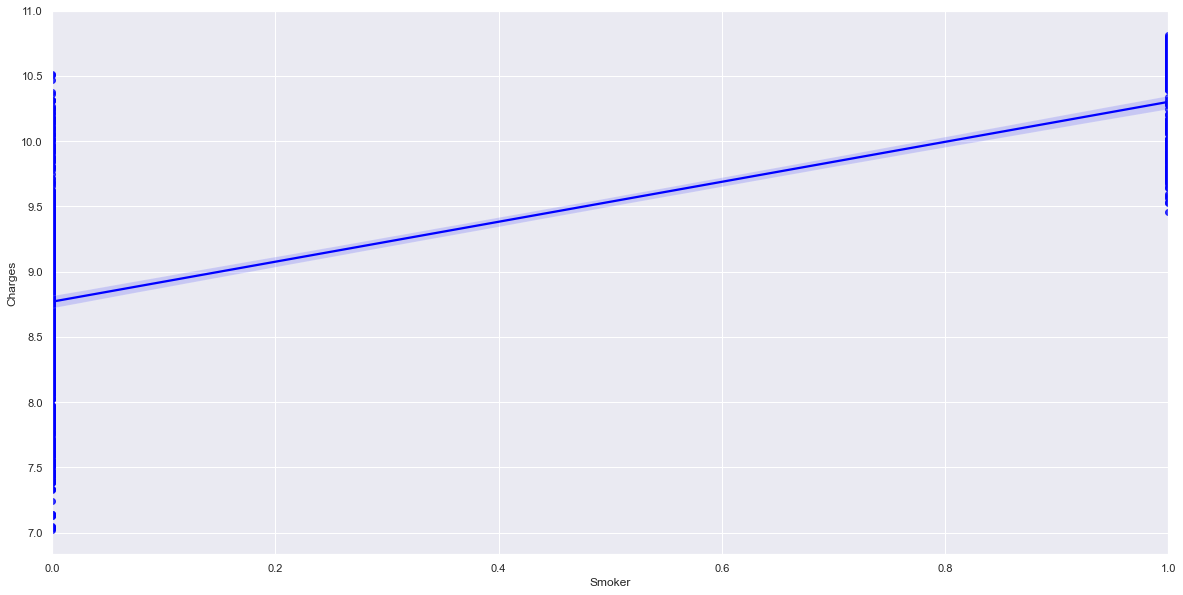

In [85]:
# Visualizing the linearity between Age and Price using Reg Plot
# plt.figure(figsize=(25,15));
import seaborn as sns
plt.rcParams['figure.figsize'] = 20,10 # similar to par(mfrow = c(2,1), mar = c(4,4,2,1)) # 2 columns and 1 row
sns.regplot(training_features.flatten(), training_target.flatten(), color = 'blue');
plt.xlabel('Smoker');
plt.ylabel('Charges');
plt.show()

### Visualising the Test set results

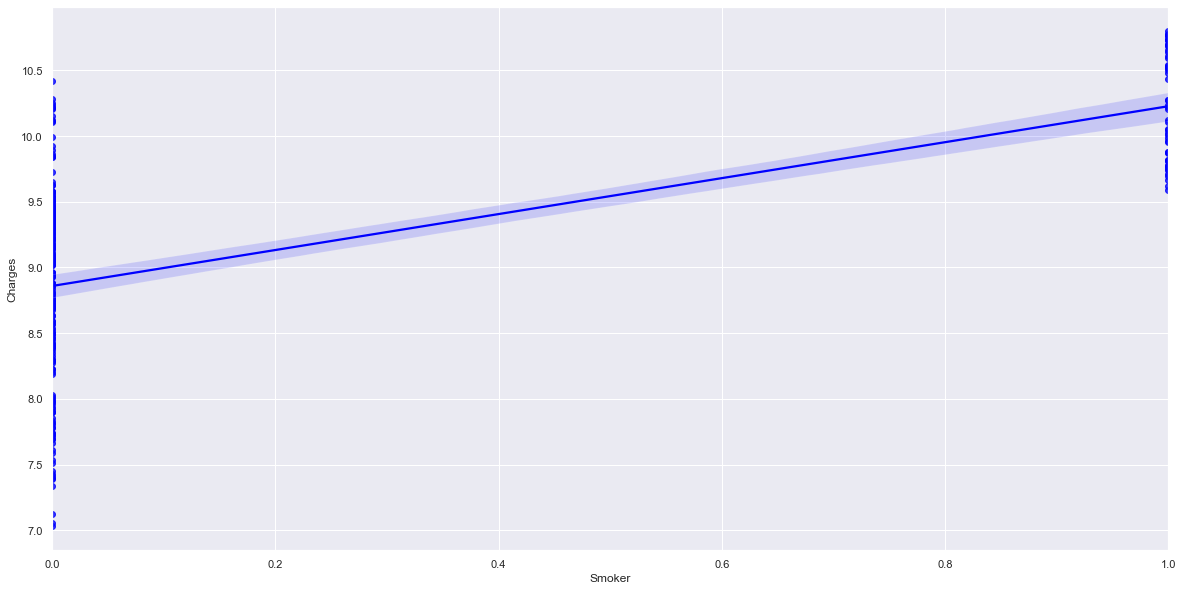

In [86]:
# Visualizing the linearity between Age and Price using Reg Plot
# plt.figure(figsize=(25,15));
plt.rcParams['figure.figsize'] = 20,10 # similar to par(mfrow = c(2,1), mar = c(4,4,2,1)) # 2 columns and 1 row
sns.regplot(test_features.flatten(), test_target.flatten(), color = 'blue');
plt.xlabel('Smoker');
plt.ylabel('Charges');
plt.show()

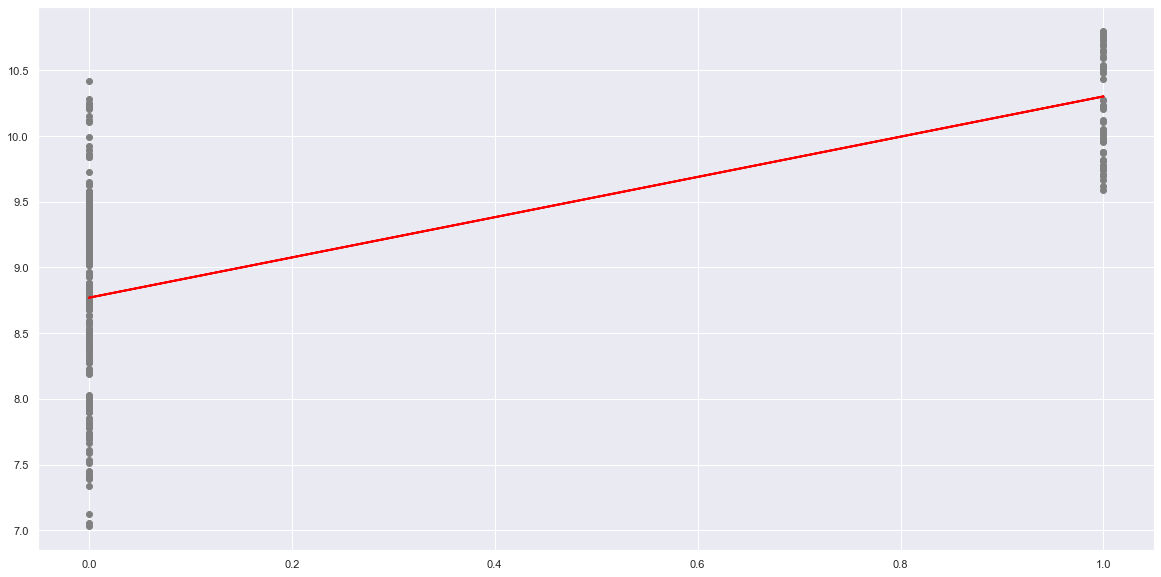

In [87]:
plt.scatter(test_features, test_target,  color='gray')
plt.plot(test_features, y_pred, color='red', linewidth=2)
plt.show()

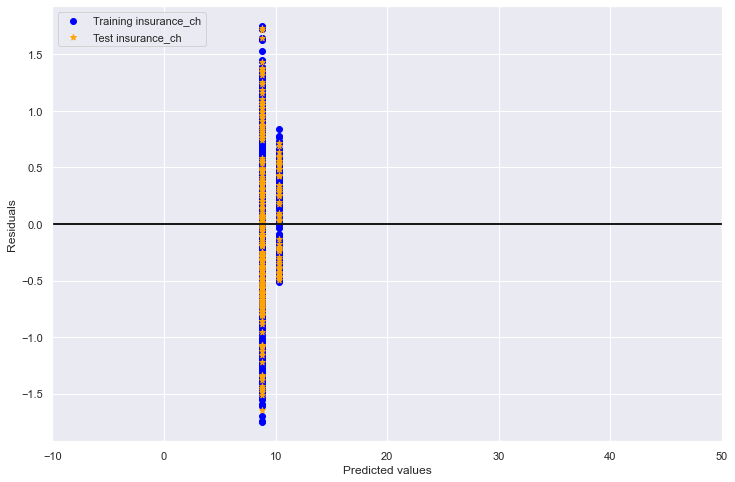

In [88]:
# Method 1: Residual Analysis

plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - training_target, c='blue', marker='o', label='Training insurance_ch')
plt.scatter(y_test_pred, y_test_pred - test_target, c='orange', marker='*', label='Test insurance_ch')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
plt.xlim([-10, 50])
plt.show()

### Simple Linear Regression with Statistical Modeling (Stats Models)

In [89]:
import statsmodels.api as sm

In [90]:
# assign target to new variable
target_var = insurance_ch_processed['charges'].values

# use year built to predict price: add constant for intercept
feature1 = sm.add_constant(insurance_ch_processed['age'], prepend=False)

# instantiate model
slr_mod = sm.OLS(target_var, feature1)

# fit the beta coefs
model_1 = slr_mod.fit()

print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     523.2
Date:                Wed, 31 Mar 2021   Prob (F-statistic):           6.67e-98
Time:                        16:34:52   Log-Likelihood:                -1544.5
No. Observations:                1331   AIC:                             3093.
Df Residuals:                    1329   BIC:                             3103.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0345      0.002     22.873      0.0

In [91]:
# grab the target variable
price_test = insurance_ch_processed['charges'].values

# prepare the testing set for prediction by adding column of ones for constant
age_test = sm.add_constant(insurance_ch_processed['age'], prepend=False)

# make test predictions
y_hat_test = model_1.predict(age_test)
print('First 5 test predictions:')
display(y_hat_test.head())

First 5 test predictions:


7     9.944369
8     9.771989
9     9.254852
10    9.909893
11    9.703038
dtype: float64

### Calculating Error

You will use these predictions to calculate the explained error (SSR) and unexplained error (SSE). Recall from lecture 15-4 that SST = SSE + SSR

Additionally, you can calculate the following with these types of error:


$$
\begin{array}{|c|c|}
\hline
\text{R-squared} & \displaystyle{\frac{\text{SSR}}{\text{SST}}} \\ \hline
\text{MSR} & \displaystyle{\frac{\text{SSR}}{\text{Regression Degrees of Freedom}}} \\ \hline
\text{MSE} & \displaystyle{\frac{\text{SSE}}{\text{Regression Degrees of Freedom}}} \\ \hline
\text{F-measure} & \displaystyle{\frac{\text{MSR}}{\text{MSE}}} \\
\hline
\end{array}
$$

You will now see how your model performs on your testing set. This will give you an idea of how the model generalizes, i.e., how it would perform if making predictions on new insurance_ch after being deployment. The next few questions require calculations of error and goodness of fit computed using the testing insurance_ch.

In [92]:
# Mean of target variable (provided)
price_test_mean = insurance_ch_processed['charges'].mean()
tsose = sum(((insurance_ch_processed['charges'].values)-(price_test_mean))**2)
print("Total Sum of Square Error (should be a number):", tsose)

Total Sum of Square Error (should be a number): 1106.0539857263136


## Polynomial Model

In [93]:
insurance_ch_processed = insurance_ch_copy

X = insurance_ch_processed['age'].values.reshape(-1,1)
y = insurance_ch_processed['charges'].values.reshape(-1,1)

In [94]:
# Import the function "PolynomialFeatures" from sklearn, to preprocess our data
# Import LinearRegression model from sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [95]:
# Set PolynomialFeatures to degree 2 and store in the variable pre_process
# Degree 2 preprocesses x to 1, x and x^2
# Degree 3 preprocesses x to 1, x, x^2 and x^3
# and so on..
 
pre_process = PolynomialFeatures(degree=7)
# Transform our x input to 1, x and x^2
X_poly = pre_process.fit_transform(X)
# Show the transformation on the notebook
X_poly

array([[1.00000000e+00, 6.40000000e+01, 4.09600000e+03, ...,
        1.07374182e+09, 6.87194767e+10, 4.39804651e+12],
       [1.00000000e+00, 5.90000000e+01, 3.48100000e+03, ...,
        7.14924299e+08, 4.21805336e+10, 2.48865148e+12],
       [1.00000000e+00, 4.40000000e+01, 1.93600000e+03, ...,
        1.64916224e+08, 7.25631386e+09, 3.19277810e+11],
       ...,
       [1.00000000e+00, 1.80000000e+01, 3.24000000e+02, ...,
        1.88956800e+06, 3.40122240e+07, 6.12220032e+08],
       [1.00000000e+00, 1.80000000e+01, 3.24000000e+02, ...,
        1.88956800e+06, 3.40122240e+07, 6.12220032e+08],
       [1.00000000e+00, 1.80000000e+01, 3.24000000e+02, ...,
        1.88956800e+06, 3.40122240e+07, 6.12220032e+08]])

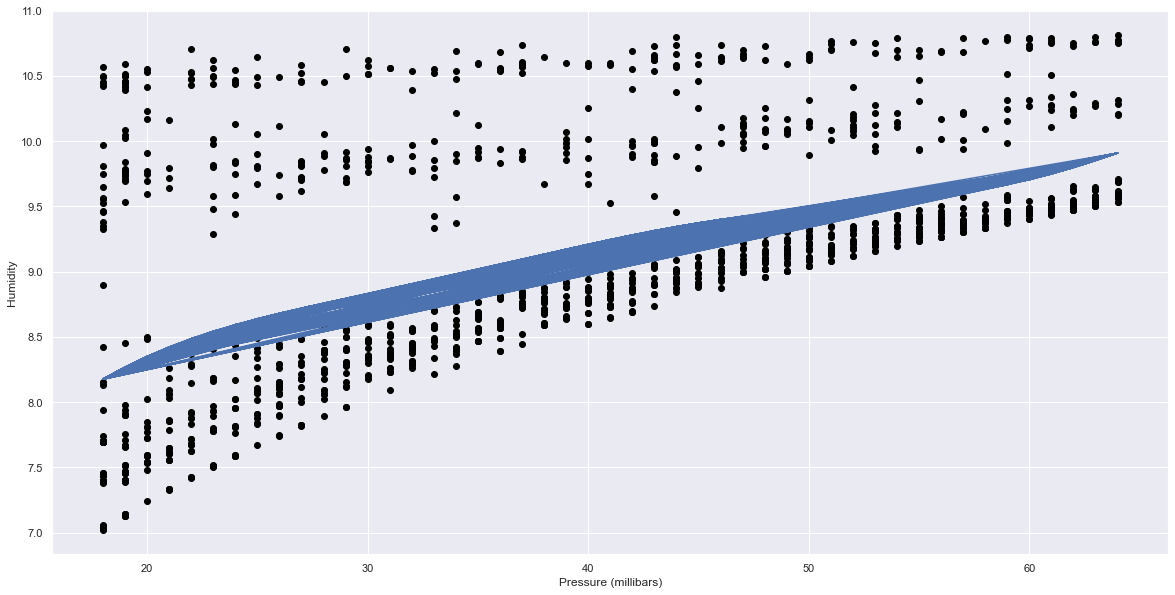

In [96]:
pr_model = LinearRegression()
# Fit our preprocessed data to the polynomial regression model
pr_model.fit(X_poly, y)
# Store our predicted Humidity values in the variable y_new
y_pred = pr_model.predict(X_poly)
# Plot our model on our data
plt.scatter(X, y, c = "black")
plt.xlabel("Pressure (millibars)")
plt.ylabel("Humidity")
plt.plot(X, y_pred)

In [97]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

0.589591712981528

### Visualising the Plynomail Regression - Training

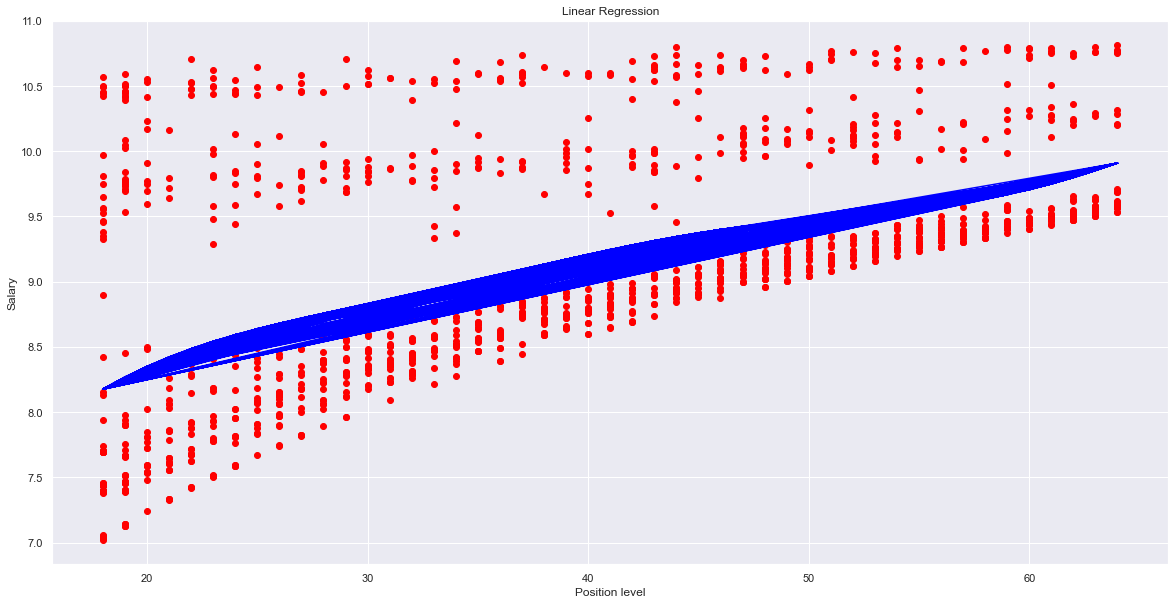

In [98]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, pr_model.predict(X_poly), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### Visualising the Plynomail Regression - Testing

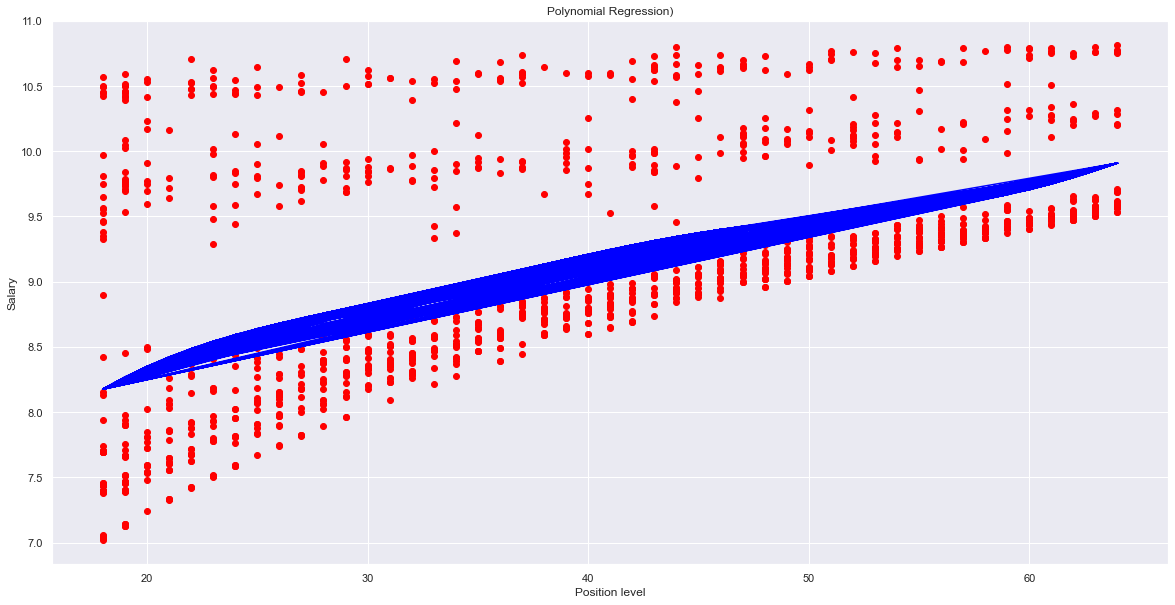

In [99]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, pr_model.predict(X_poly), color = 'blue')
plt.title('Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Multiple Linear Regression

### Machine Learning Method

In [100]:
 X = insurance_ch_copy.drop('charges', axis = 1)
 y = insurance_ch_copy.charges

In [101]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(X,y,
                                               test_size = .2,
                                               random_state=12)

In [102]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
7,64,36.96,2,1,1,0,1,0
8,59,41.14,1,1,1,0,1,0
9,44,38.06,0,0,1,0,1,0
10,63,37.70,0,0,1,0,0,1
11,57,42.13,1,1,1,0,1,0


In [103]:
MltRegressor = LinearRegression()  
MltRegressor.fit(training_features, training_target)

LinearRegression()

To see what coefficients our regression model has chosen, execute the following script:

In [104]:
coeff_df = pd.DataFrame(MltRegressor.coef_, training_features.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
age,0.034810
bmi,0.013605
children,0.097603
sex_male,-0.059987
smoker_yes,1.568414
region_northwest,-0.047137
region_southeast,-0.126848
region_southwest,-0.123687


In [105]:
y_pred = MltRegressor.predict(test_features)

In [106]:
df = pd.DataFrame({'Actual': test_target, 'Predicted': y_pred, "Residual": (test_target - y_pred)})

df.head(5)


,Actual,Predicted,Residual
1066,8.304138,8.434644,-0.130506
716,9.060039,9.021993,0.038046
144,10.431393,9.694025,0.737368
330,9.743515,9.648125,0.095390
785,8.941077,9.004026,-0.062949


Now let's plot the comparison of Actual and Predicted values

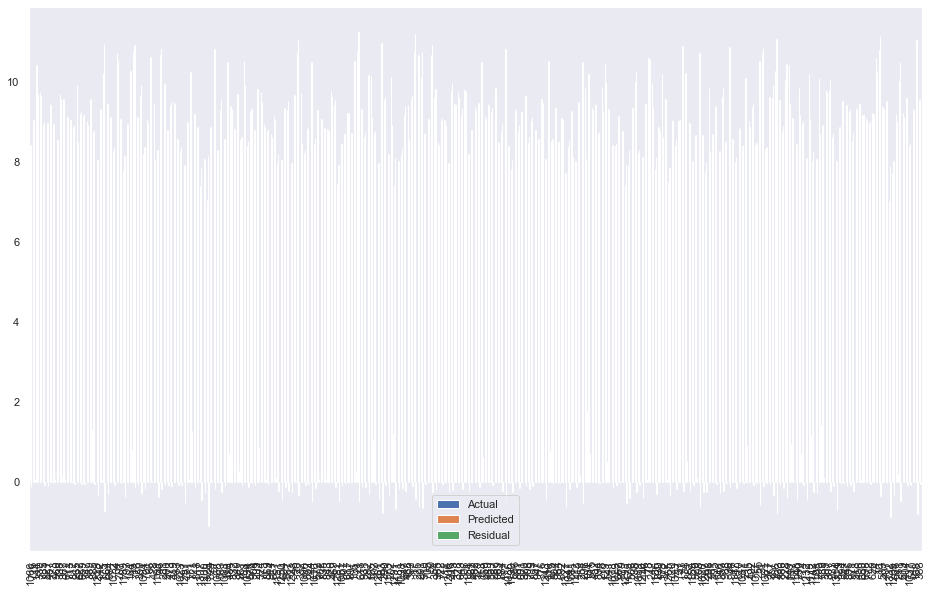

In [107]:
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [108]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [109]:
# Root Mean Squared Deviation
rmsd = np.sqrt(mean_squared_error(test_target, y_pred))      
r2_value = r2_score(test_target, y_pred)                     

print("Intercept                :", MltRegressor.intercept_)
print("Root Mean Squared Error  :", rmsd)
print('Mean Absolute Error      :', metrics.mean_absolute_error(test_target, y_pred))  
print('Mean Squared Error       :', metrics.mean_squared_error(test_target, y_pred))  
print("R^2 Value                :", r2_value)

Intercept                : 6.993340760024491
Root Mean Squared Error  : 0.4267835512248666
Mean Absolute Error      : 0.262556529200053
Mean Squared Error       : 0.18214419959610834
R^2 Value                : 0.7518268939145392


### Checks for multicolinearity

Text(0.5, 1.0, 'Multi-Collinearity of Insurance')

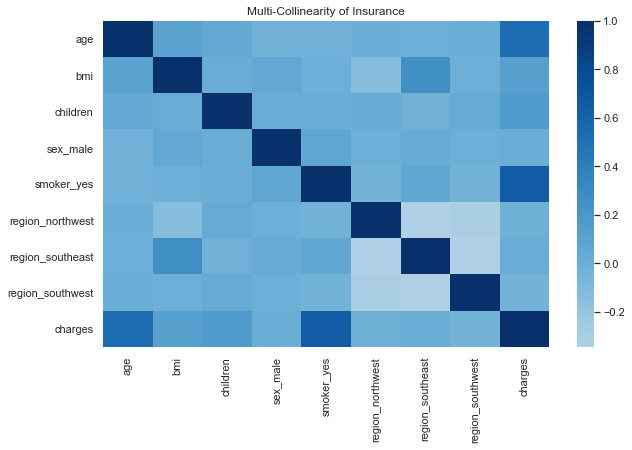

In [110]:
# Storing subplots in fig and ax variables
fig, ax = plt.subplots(figsize=(10,6))

# Creating a seaborn heatmap with inputs df
sns.heatmap(insurance_ch_copy.corr(), center=0, cmap="Blues")#annot=True

# Setting the title 
ax.set_title("Multi-Collinearity of Insurance")

### Prediction with Statistical Modeling (Stats Models)

You can now create a DataFrame using different numeric & categorical features to build a new model. For this model, you'll use the following features:
- `GarageFinish`: Interior finish of the garage (categorical)
- `TotRmsAbvGrd`: Total rooms above grade - not including bathrooms (numeric)
- `BedroomAbvGr`: Number of bedrooms above grade (numeric)

In [111]:
# grab target variable
price_train = insurance_ch_copy['charges'].values

# add a column of ones for the intercept term
feats_train = sm.add_constant(insurance_ch_copy, prepend=False)

# instantiate model
lin_mod = sm.OLS(price_train, feats_train)

# fit the beta coefs
SMMLRegression = lin_mod.fit()

print(SMMLRegression .summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.089e+30
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:35:02   Log-Likelihood:                 41376.
No. Observations:                1331   AIC:                        -8.273e+04
Df Residuals:                    1321   BIC:                        -8.268e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age               2.727e-16   2.23e-17  

#### Influence plots

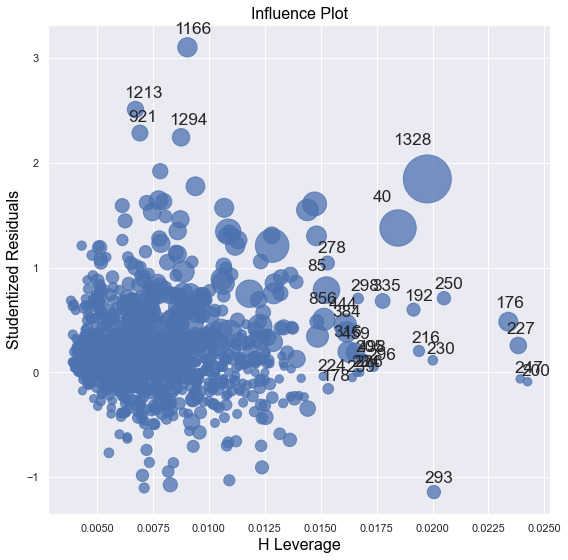

In [112]:
fig, ax = plt.subplots(figsize=(9,9))
fig = sm.graphics.influence_plot(SMMLRegression , ax=ax, criterion='cooks')

#### Regression plot

The plot_regress_exog function is a convenience function that gives a 2x2 plot containing the dependent variable and fitted values with confidence intervals vs. the independent variable chosen, the residuals of the model vs. the chosen independent variable, a partial regression plot, and a CCPR plot. This function can be used for quickly checking modeling assumptions with respect to a single regressor.

In [113]:
# fig = plt.figure(figsize=(12, 8))
# fig = sm.graphics.plot_regress_exog(MltRegressor, 'age', fig=fig)

#### Fit plot

The plot_fit function plots the fitted values versus a chosen independent variable. It includes prediction confidence intervals and optionally plots the true dependent variable.

In [114]:
# fig, ax = plt.subplots(figsize=(12,8))
# fig = sm.graphics.plot_fit(Mlt_Reg_Model_1, 'age', ax=ax)

#### Normality of the residuals

Jarque-Bera test:

In [115]:
# name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
# test = sms.jarque_bera(Mlt_Reg_Model_1.resid)
# lzip(name, test)

Omni test:

In [116]:
# name = ['Chi^2', 'Two-tail probability']
# test = sms.omni_normtest(Mlt_Reg_Model_1.resid)
# lzip(name, test)

#### Influence test

In [117]:
# from statsmodels.stats.outliers_influence import OLSInfluence

# test_class = OLSInfluence(SMMLRegression )
# test_class.dfbetas[:5, :]

In [118]:
# from statsmodels.graphics.regressionplots import plot_leverage_resid2

# fig, ax = plt.subplots(figsize=(8, 6))
# fig = plot_leverage_resid2(SMMLRegression , ax=ax)

#### Multicollinearity

Condition number

In [119]:
# np.linalg.cond(SMMLRegression .model.exog)

#### Heteroskedasticity tests

Breush-Pagan test:

In [120]:
# name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
# test = sms.het_breushpagan(Mlt_Reg_Model_1.resid, Mlt_Reg_Model_1.model.exog)
# lzip(name, test)

Goldfeld-Quandt test

In [121]:
# name = ['F statistic', 'p-value']
# test = sms.het_goldfeldquandt(Mlt_Reg_Model_1.resid, Mlt_Reg_Model_1.model.exog)
# lzip(name, test)

#### Linearity

Harvey-Collier multiplier test for Null hypothesis that the linear specification is correct:

In [122]:
# name = ['t value', 'p value']
# test = sms.linear_harvey_collier(Mlt_Reg_Model_1)
# lzip(name, test)

#### VIF

In [123]:
# # For each X, calculate VIF (Variance Inflation Factor) and save in dataframe
# # VIF is a measure used to determine multicollinearity 
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(training_features, i) for i in range(training_features.shape[1])]
# vif["features"] = insurance_ch_copy.columns

In [124]:
# # Sorting VIF in descending order
# vif.sort_values("VIF Factor",ascending=False).head()

In [125]:
# # Storing rows with VIF over 11 
# inf = vif.loc[vif["VIF Factor"] > 11]

# # Storing the feature names that have a VIF over 11
# inf_list = list(inf['features'])

# # Dropping high VIF factors
# inputs = insurance_ch_copy.drop(columns=inf_list)
# inputs

In [126]:
# # Displaying correlation matrix of the inputs
# corr_df = insurance_ch_copy.corr()
# sns.heatmap(corr_df)

## Regularization

In regularization, what we do is normally we keep the same number of features, but reduce the magnitude of the coefficients 

In [127]:
# #Let us take a look at the coefficients of feature in our above regression model.

# # checking the magnitude of coefficients

# from pandas import Series, DataFrame

# predictors = test_features.columns

# coef = Series(MltRegressor.coef_,predictors).sort_values()

# coef.plot(kind='bar', title='Modal Coefficients')

We can see that coefficients of neighborhood_Crawfor and neighrich is much higher as compared to rest of the coefficients. Therefore the total price of an item would be more driven by these two features

### Multiple Linear Regression

In [128]:
insurance_ch_copy.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
7,64,36.96,2,1,1,0,1,0,10.811296
8,59,41.14,1,1,1,0,1,0,10.798968
9,44,38.06,0,0,1,0,1,0,10.797229
10,63,37.70,0,0,1,0,0,1,10.795986
11,57,42.13,1,1,1,0,1,0,10.792931


In [129]:
 X = insurance_ch_copy.drop('charges', axis = 1)
 y = insurance_ch_copy.charges

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(X,y,
                                               test_size = .2,
                                               random_state=12)

In [130]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MltRegressor = LinearRegression()  
MltRegressor.fit(training_features, training_target)

y_pred = MltRegressor.predict(test_features)


# Root Mean Squared Deviation
mlrmsd = np.sqrt(mean_squared_error(test_target, y_pred))      
mlr2_value = r2_score(test_target, y_pred)                     

print("Intercept                :", MltRegressor.intercept_)
print("Root Mean Squared Error  :", mlrmsd)
print('Mean Absolute Error      :', metrics.mean_absolute_error(test_target, y_pred))  
print('Mean Squared Error       :', metrics.mean_squared_error(test_target, y_pred))  
print("R^2 Value                :", mlr2_value)

Intercept                : 6.993340760024491
Root Mean Squared Error  : 0.4267835512248666
Mean Absolute Error      : 0.262556529200053
Mean Squared Error       : 0.18214419959610834
R^2 Value                : 0.7518268939145392


#### Get ML coefficient and print them

In [131]:
MLreg_coefficient = pd.DataFrame()
MLreg_coefficient["Columns"]= training_features.columns
MLreg_coefficient['Coefficient Estimate'] = pd.Series(MltRegressor.coef_)
print(MLreg_coefficient)

            Columns  Coefficient Estimate
0               age              0.034810
1               bmi              0.013605
2          children              0.097603
3          sex_male             -0.059987
4        smoker_yes              1.568414
5  region_northwest             -0.047137
6  region_southeast             -0.126848
7  region_southwest             -0.123687


#### plotting the coefficient score

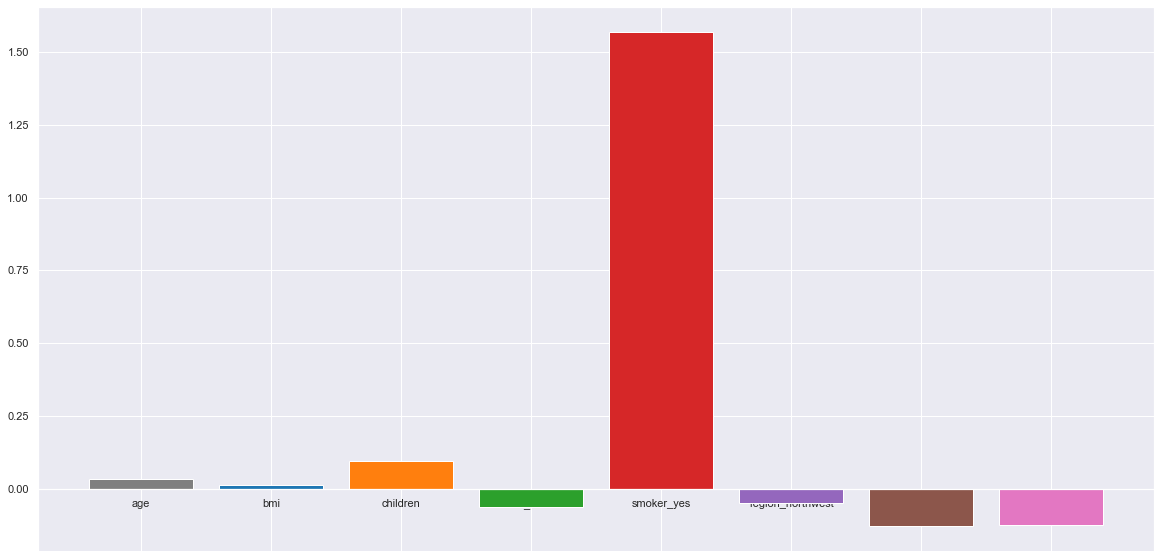

In [132]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))
  
color =['tab:gray', 'tab:blue', 'tab:orange', 
'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
  
ax.bar(MLreg_coefficient["Columns"], 
MLreg_coefficient['Coefficient Estimate'], 
color = color)
  
ax.spines['bottom'].set_position('zero')
  
plt.style.use('ggplot')
plt.show()

#### Bias Variance Check

In [133]:
# # define the model
# model = LinearRegression()
 
# # estimating the bias and variance
# avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(model, X_train,
#                                                             y_train, X_test,
#                                                             y_test,
#                                                             loss='mse',
#                                                             num_rounds=50,
#                                                             random_seed=20)
 
# # summary of the results
# print('Average expected loss: %.3f' % avg_expected_loss)
# print('Average bias: %.3f' % avg_bias)
# print('Average variance: %.3f' % avg_var)

### Ridge Regression

Ridge Regression added a term in ordinary least square error function that regularizes the value of coefficients of variables. This term is the sum of squares of coefficient multiplied by the parameter The motive of adding this term is to penalize the variable corresponding to that coefficient not very much correlated to the target variable. This term is called L2 regularization.

In [134]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge


RERegressor = Ridge()
RERegressor.fit(training_features, training_target)

y_pred = RERegressor.predict(test_features)


# Root Mean Squared Deviation
rermsd = np.sqrt(mean_squared_error(test_target, y_pred))      
rer2_value = r2_score(test_target, y_pred)                     

print("Intercept                :", RERegressor.intercept_)
print("Root Mean Squared Error  :", rermsd)
print('Mean Absolute Error      :', metrics.mean_absolute_error(test_target, y_pred))  
print('Mean Squared Error       :', metrics.mean_squared_error(test_target, y_pred))  
print("R^2 Value                :", rer2_value)

Intercept                : 6.994898746286955
Root Mean Squared Error  : 0.42641165762265615
Mean Absolute Error      : 0.26263046947153224
Mean Squared Error       : 0.18182690175650132
R^2 Value                : 0.7522592150676919


In [135]:
RERegressor

Ridge()

#### Get ML coefficient and print them

In [136]:
# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= training_features.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(RERegressor.coef_)
print(ridge_coefficient)

            Columns  Coefficient Estimate
0               age              0.034803
1               bmi              0.013576
2          children              0.097620
3          sex_male             -0.059025
4        smoker_yes              1.559190
5  region_northwest             -0.046381
6  region_southeast             -0.125083
7  region_southwest             -0.122553


#### plotting the coefficient score

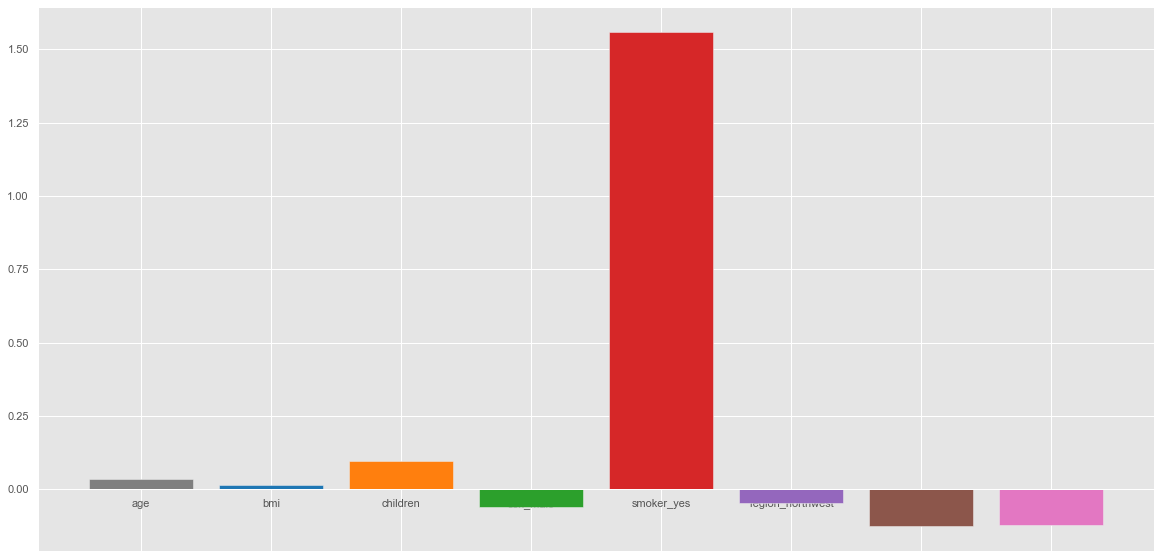

In [137]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))
  
color =['tab:gray', 'tab:blue', 'tab:orange', 
'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
  
ax.bar(ridge_coefficient["Columns"], 
ridge_coefficient['Coefficient Estimate'], 
color = color)
  
ax.spines['bottom'].set_position('zero')
  
plt.style.use('ggplot')
plt.show()

### LASSO Regression

Lasso Regression is similar to Ridge regression except here we add Mean Absolute value of coefficients in place of mean square value. Unlike Ridge Regression, Lasso regression can completely eliminate the variable by reducing its coefficient value to 0. The new term we added to Ordinary Least Square(OLS) is called L1 Regularization.

In [138]:
from sklearn.linear_model import Lasso


LORegressor = Lasso()  
LORegressor.fit(training_features, training_target)

y_pred = LORegressor.predict(test_features)


# Root Mean Squared Deviation
lormsd = np.sqrt(mean_squared_error(test_target, y_pred))      
lor2_value = r2_score(test_target, y_pred)                     

print("Intercept                :", LORegressor.intercept_)
print("Root Mean Squared Error  :", lormsd)
print('Mean Absolute Error      :', metrics.mean_absolute_error(test_target, y_pred))  
print('Mean Squared Error       :', metrics.mean_squared_error(test_target, y_pred))  
print("R^2 Value                :", lor2_value)

Intercept                : 7.938030696834636
Root Mean Squared Error  : 0.7142600248548935
Mean Absolute Error      : 0.5758982003299987
Mean Squared Error       : 0.5101673831057131
R^2 Value                : 0.304892363470348


In [139]:
LORegressor

Lasso()

#### Get ML coefficient and print them

In [140]:
LASSO_coefficient = pd.DataFrame()
LASSO_coefficient["Columns"]= training_features.columns
LASSO_coefficient['Coefficient Estimate'] = pd.Series(LORegressor.coef_)
print(LASSO_coefficient)

            Columns  Coefficient Estimate
0               age              0.029382
1               bmi              0.000000
2          children              0.000000
3          sex_male              0.000000
4        smoker_yes              0.000000
5  region_northwest             -0.000000
6  region_southeast              0.000000
7  region_southwest             -0.000000


#### plotting the coefficient score

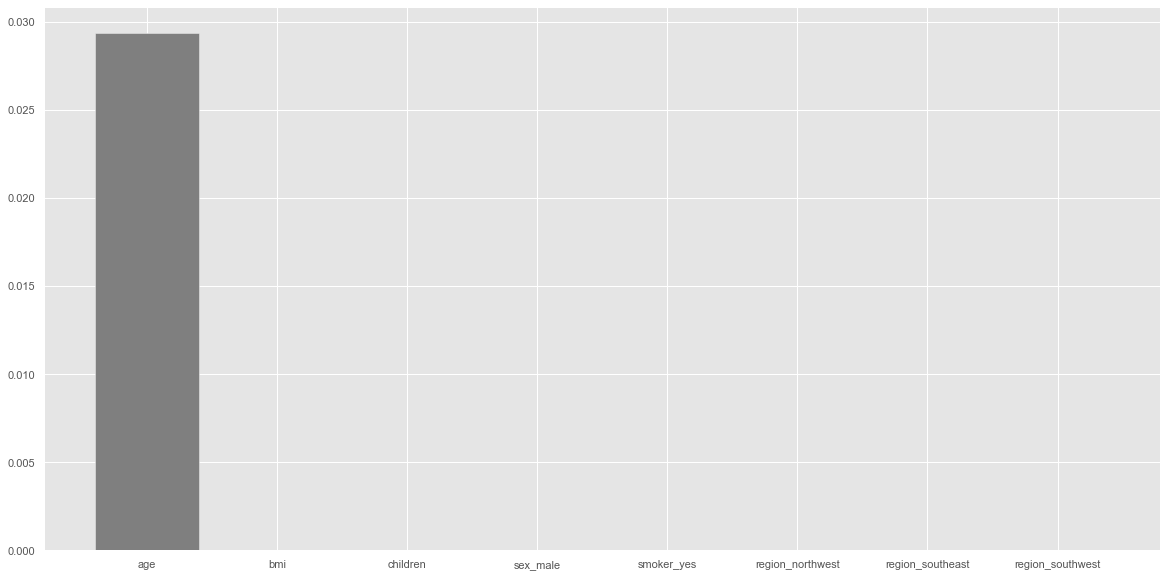

In [141]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))
  
color =['tab:gray', 'tab:blue', 'tab:orange', 
'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
  
ax.bar(LASSO_coefficient["Columns"], 
LASSO_coefficient['Coefficient Estimate'], 
color = color)
  
ax.spines['bottom'].set_position('zero')
  
plt.style.use('ggplot')
plt.show()

### ElasticNet Regression

ElasticNet is a form of regularization regression that combines the properties of both Ridge Regression and LASSO regression. It seeks to minimize the complexity of the regression model
(magnitude and number of regression coefficients) by penalizing the model using both the L2-norm (sum squared coefficient values) and the L1-norm (sum absolute coefficient values). You can construct an ElasticNet model using the ElasticNet class.

In [142]:
from sklearn.linear_model import ElasticNet


ENRegressor = ElasticNet()  
ENRegressor.fit(training_features, training_target)

y_pred = ENRegressor.predict(test_features)


# Root Mean Squared Deviation
enrmsd = np.sqrt(mean_squared_error(test_target, y_pred))      
enr2_value = r2_score(test_target, y_pred)                     

print("Intercept                :", ENRegressor.intercept_)
print("Root Mean Squared Error  :", enrmsd)
print('Mean Absolute Error      :', metrics.mean_absolute_error(test_target, y_pred))  
print('Mean Squared Error       :', metrics.mean_squared_error(test_target, y_pred))  
print("R^2 Value                :", enr2_value)

Intercept                : 7.843554522406414
Root Mean Squared Error  : 0.7115459593706065
Mean Absolute Error      : 0.5780466649943494
Mean Squared Error       : 0.5062976522966368
R^2 Value                : 0.310164906415622


#### Get ML coefficient and print them

In [143]:
elastic_coefficient = pd.DataFrame()
elastic_coefficient["Columns"]= training_features.columns
elastic_coefficient['Coefficient Estimate'] = pd.Series(ENRegressor.coef_)
print(elastic_coefficient)

            Columns  Coefficient Estimate
0               age              0.031814
1               bmi              0.000000
2          children              0.000000
3          sex_male              0.000000
4        smoker_yes              0.000000
5  region_northwest             -0.000000
6  region_southeast              0.000000
7  region_southwest             -0.000000


#### plotting the coefficient score

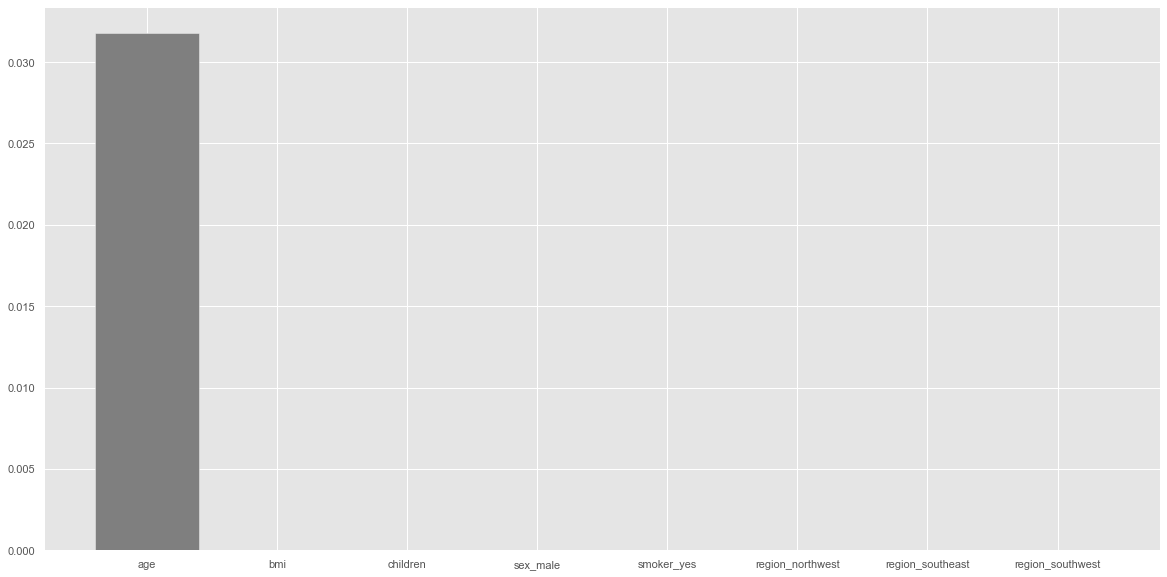

In [144]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))
  
color =['tab:gray', 'tab:blue', 'tab:orange', 
'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
  
ax.bar(elastic_coefficient["Columns"], 
elastic_coefficient['Coefficient Estimate'], 
color = color)
  
ax.spines['bottom'].set_position('zero')
  
plt.style.use('ggplot')
plt.show()

## Decision Tree Regression

In [145]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor

In [146]:
#Build the Model
DTregressor = DecisionTreeRegressor(random_state = 45)

In [147]:
DTregressor

DecisionTreeRegressor(random_state=45)

In [148]:
#Fit the Model to the Training 
DTregressor.fit(training_features, training_target)

DecisionTreeRegressor(random_state=45)

In [184]:
#Fit the Model to the Training 
DTregressor

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=45, splitter='best')

In [149]:
# Predicting a new result
DT_pred = DTregressor.predict(test_features)

In [150]:
df = pd.DataFrame({'Actual': test_target, 'Predicted': DT_pred})  
df.head()

,Actual,Predicted
1066,8.304138,9.917282
716,9.060039,9.059962
144,10.431393,10.431190
330,9.743515,9.715818
785,8.941077,8.942562


In [151]:
# df = pd.DataFrame({'Actual': test_target, 'Predicted': y_pred})
# df1 = df.head(25)
# df1.head(5)


### SVR

In [152]:
# Fitting Support Vector Maching to the dataset
from sklearn.svm import SVR

In [153]:
#Build the Model
SVRregressor = SVR(kernel = 'linear')

In [154]:
'''#Build the Model
SVRregressor = SVR(kernel = 'rbf')'''

"#Build the Model\nSVRregressor = SVR(kernel = 'rbf')"

In [177]:
#Fit the Model to the Training 
SVRregressor.fit(training_features, training_target)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [179]:
# Predicting a new result
SVR_pred = SVRregressor.predict(test_features)

In [180]:
df = pd.DataFrame({'Actual': test_target, 'Predicted': SVR_pred})  
df.head()

,Actual,Predicted
1066,8.304138,8.274869
716,9.060039,9.008472
144,10.431393,9.515315
330,9.743515,9.515664
785,8.941077,8.898931


### Evaluating the Algorithm  
The final step is to evaluate the performance of algorithm. We'll do this by finding the values for MAE, MSE and RMSE. Mean Absolute Error (MAE) and Root mean squared error (RMSE) are two of the most common metrics used to measure accuracy for continuous variables.


**Similarities:** Both MAE and RMSE express average model prediction error in units of the variable of interest. Both metrics can range from 0 to ∞ and are indifferent to the direction of errors. They are negatively-oriented scores, which means lower values are better.  

**Differences:** Taking the square root of the average squared errors has some interesting implications for RMSE. Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable.

In [181]:
# Root Mean Squared Deviation
dtrmsd = np.sqrt(mean_squared_error(test_target, y_pred))      
#dtr2_value = r2_score(test_target, y_pred) 
dtr2_value  = DTregressor.score(training_features, training_target)
mlr2_value  = MltRegressor.score(training_features, training_target)
rer2_value  = RERegressor.score(training_features, training_target)
lor2_value  = LORegressor.score(training_features, training_target)
enr2_value  = ENRegressor.score(training_features, training_target)
svrr2_value = SVRregressor.score(training_features, training_target)

In [174]:
from sklearn import metrics  

print(" Multiliear R^2 Value           :", mlr2_value)
print(" Ridge (L2) R^2 Value           :", rer2_value)
print(" LASSO (L1) R^2 Value           :", lor2_value)
print(" ElasticNet R^2 Value           :", enr2_value)
print(" Decision Tree R^2 Value        :", dtr2_value)
print(" SVR R^2 Value                  :", svrr2_value)

 Multiliear R^2 Value           : 0.7672929056117285
 Ridge (L2) R^2 Value           : 0.7672765989422228
 LASSO (L1) R^2 Value           : 0.2697666117439512
 ElasticNet R^2 Value           : 0.27407833335641785
 Decision Tree R^2 Value        : 0.9946039256044922
 SVR R^2 Value                  : 0.7469766807227172


In [182]:
dtr2_value   = DTregressor.score(test_features, test_target)
mlr2_value   = MltRegressor.score(test_features, test_target)
rer2_value   = RERegressor.score(test_features, test_target)
lor2_value   = LORegressor.score(test_features, test_target)
enr2_value   = ENRegressor.score(test_features, test_target)
svrr2_value  = SVRregressor.score(test_features, test_target)

In [183]:
from sklearn import metrics  

print(" Multiliear R^2 Value           :", mlr2_value)
print(" Ridge (L2) R^2 Value           :", rer2_value)
print(" LASSO (L1) R^2 Value           :", lor2_value)
print(" ElasticNet R^2 Value           :", enr2_value)
print(" Decision Tree R^2 Value        :", dtr2_value)
print(" SVR R^2 Value                  :", svrr2_value)

 Multiliear R^2 Value           : 0.7518268939145392
 Ridge (L2) R^2 Value           : 0.7522592150676919
 LASSO (L1) R^2 Value           : 0.304892363470348
 ElasticNet R^2 Value           : 0.310164906415622
 Decision Tree R^2 Value        : 0.66765558100031
 SVR R^2 Value                  : 0.734607455380121


### Visualising the Training set results

In [163]:
# # Visualising the Decision Tree Regression results (higher resolution)
# plt.rcParams['figure.figsize'] = 20,10 # similar to par(mfrow = c(2,1), mar = c(4,4,2,1)) # 2 columns and 1 row

# X_grid = np.arange(min(X), max(X), 0.01)
# X_grid = X_grid.reshape((len(X_grid), 1))
# plt.scatter(X, y, color = 'red')
# plt.plot(X_grid, DTregressor.predict(X_grid), color = 'blue')
# plt.title('Truth or Bluff (Decision Tree Regression)')
# plt.xlabel('Position level')
# plt.ylabel('Salary')
# plt.show()